---------------------
# Implementing and learning Marketing Analysis

## Problem Statement
--------------------
A Company has hired you as a Data Scientist and you've been told that recent marketing campaigns have not been as effective as they were expected to be and the conversion rate is very low.
Your task is to analyze the data, understand the problem and identify key insights and recommendations.  

Analyse the data and provide insights on the following topics:

- Campaign successes/failures
- Product preferences
- Channel performances
- Customer profiles based on the spending habits


**Information about the data is as follows:**
- ID : Unique ID of each customer
- Year_Birth : Age of the customer
- Education : Customer's level of education
- Marital_Status : Customer's marital status
- Kidhome : Number of small children in customer's household
- Teenhome : Number of teenagers in customer's household
- Income : Customer's yearly household income
- Recency : Number of days since the last purchase
- MntFishProducts : The amount spent on fish products in the last 2 years
- MntMeatProducts : The amount spent on meat products in the last 2 years
- MntFruits : The amount spent on fruits products in the last 2 years
- MntSweetProducts : Amount spent on sweet products in the last 2 years
- MntWines : The amount spent on wine products in the last 2 years
- MntGoldProds : The amount spent on gold products in the last 2 years
- NumDealsPurchases : Number of purchases made with discount
- NumCatalogPurchases : Number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases : Number of purchases made directly in stores
- NumWebPurchases : Number of purchases made through the company's website
- NumWebVisitsMonth : Number of visits to company's website in the last month
- AcceptedCmp1 : 1 if customer accepted the offer in the first campaign, 0 otherwise 
- AcceptedCmp2 : 1 if customer accepted the offer in the second campaign, 0 otherwise
- AcceptedCmp3 : 1 if customer accepted the offer in the third campaign, 0 otherwise
- AcceptedCmp4 : 1 if customer accepted the offer in the fourth campaign, 0 otherwise
- AcceptedCmp5 : 1 if customer accepted the offer in the fifth campaign, 0 otherwise
- Response : 1 if customer accepted the offer in the last campaign, 0 otherwise 
- Complain : 1 If the customer complained in the last 2 years, 0 otherwise
- Country: Country customer belongs to

In [1]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
# loading the datset

df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


### Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

**Observations:**  
- Data contains 28 columns and 2,240 observations  
- Income column is of type object and has less than 2,240 non-null values meaning we have missing values


### Let's check the missing values in columns.

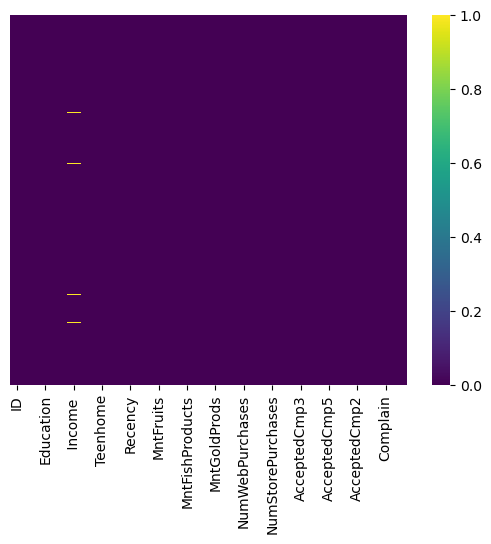

In [3]:
# % Null values in the Income column
sns.heatmap(df.isna(),yticklabels=False, cmap = 'viridis')
plt.show()


### Lets check the percent of missing values in Income

In [4]:
all_vals = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count())*100
missing = pd.concat([all_vals, percent], axis=1, keys=['Missing values', 'Percent Missing'])
missing.head(1)

,Missing values,Percent Missing
Income,24,1.071429


In [5]:
# Handling the Income data type

df.columns = df.columns.str.replace(' ', '$')
df.rename(columns = {'$Income$':'Income'}, inplace = True)

In [6]:
df['new_income'] = df['Income'].str.replace(r'\D+', '')
df[['Income','new_income']]


,Income,new_income
0,"$84,835.00",8483500
1,"$57,091.00",5709100
2,"$67,267.00",6726700
3,"$32,474.00",3247400
4,"$21,474.00",2147400
...,...,...
2235,"$66,476.00",6647600
2236,"$31,056.00",3105600
2237,"$46,310.00",4631000
2238,"$65,819.00",6581900


In [7]:
df['new_income'] = pd.to_numeric(df['new_income'])
df['new_income'] = df['new_income']/100 
df['new_income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: new_income, Length: 2240, dtype: float64

### Let's create a list for numerical columns in the dataset and check the summary statistics 

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'new_income'],
      dtype='object')

In [9]:
num_cols=['Year_Birth','new_income','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Kidhome',
       'Teenhome']

In [10]:
# printing descriptive statistics of numerical columns

df[num_cols].describe()

,Year_Birth,new_income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Kidhome,Teenhome
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.444196,0.506250
std,11.984069,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.538398,0.544538
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,1977.000000,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1.000000,1.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,2.000000,2.000000


**Observations:**

1 Average household income of customers is 52247.25 and the median income  is 51381.5. Important point to note is that max income range is 66,6666 while min is 1730. This information is crutial for the marketing campaign

2 Recency has an average of 50 and goes on from the range of 0 to 99. 'Recency' stands for "Number of days since the last purchase."

3 We also get to look at the average spend on different categories of products :
    -On average, the amount spent on fish products in the last 2 years (MntFishProducts) is 37.52
    -Average spent on meat products (MntMeatProducts) is 166.95
    -Average spent on fruits products (MntFruits) is 26.30
    -Average spent on sweet products (MntSweetProducts) is 27.06
    -Average spent on wine products (MntWine) is 303.93
    -Average spent on gold products (MntGoldProds) is 44.02

4 On average, customers made 2.32 number of purchases with a discount (NumDealsPurchases) and the maximum discounted purchases are 15.

5 The customers made average of 4.08 purchases through the company's website and the medium is 4 which shows a slightly right-skew while the maximum number of purchases through the website is 27.

6 The customer made on average 2.66 number of catalog goods (buying goods to be shipped through the mail) purchases whilethe maximum being 28.

7 On average, the customer made 5.79 number of purchases directly in stores witha  medium of 5. Again this is a slightly right-skew. On the other hand, the maximum number of purchases made directly in stores is 13.

8 The average customers visiting the company website last month were 5.31 (NumWebVisitsMonth), and the medium is 6. Here we see a left-skew. The maximum number of purchases made through the website are 20.

9 Is visible that at max, there are 2 children in the household that is 'Kidhome' and 'Teenhome'



### Let's create a list for categorical columns in the dataset and check the count of each category

In [11]:
#cat_cols contain categorical variables
cat_cols=['Education', 'Marital_Status', 'Complain', 'Country', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response']

In [12]:
# Printing the count of each unique value in each column

for column in cat_cols:
    print(df[column].value_counts(normalize=False))
    print("-" * 40)

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
----------------------------------------
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64
----------------------------------------
0    2219
1      21
Name: Complain, dtype: int64
----------------------------------------
SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64
----------------------------------------
0    2096
1     144
Name: AcceptedCmp1, dtype: int64
----------------------------------------
0    2210
1      30
Name: AcceptedCmp2, dtype: int64
----------------------------------------
0    2077
1     163
Name: AcceptedCmp3, dtype: int64
----------------------------------------
0    2073
1     167
Name: AcceptedCmp4, dtype: int64
----------------------------------------

**Observations:**
- In education, there is 2n cycle and Master. We can combine these two categories as they mean the same.
- We can combine the multiple category in Marital status to either 'Alone' or 'Single'.
- Also its not clear what the terms 'Absurd' and 'YOLO' mean. So, we can combine these categories to make a new category called  'Others'.
- There are 21 customers complaints in the last two years.
- Majority of the customers belong to Spain while Mexico has the least.
- The most common educational status is Graduation
- The most common marital status is Married

## Data Preprocessing and EDA

We will first prepare our dataset for analysis.
- Fixing the categories
- Creating new columns as the total amount spent, total purchase made, total kids at home and total accepted campaigns
- Handling missing values and outliers
- Extracting insights from the data

#### Replacing the "2n Cycle" category with "Master" in Education and "YOLO", "Alone", and "Absurd" categories with "Single" in Marital_Status

In [13]:
# Replacing 2n Cycle with Master

df["Education"].replace("2n Cycle", "Master", inplace=True)

In [14]:
# Replacing Alone with Single

df["Marital_Status"].replace("Alone", "Single", inplace=True)

In [15]:
# Replacing YOLO and Absurd with Other

df['Marital_Status'].replace(["Absurd", "YOLO"], "Others", inplace=True)

We have fixed the categories in the Marital_Status. Now, let's see the distribution count in different categories for marital status.

In [16]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Others        4
Name: Marital_Status, dtype: int64

**Observation**:

- The majority of customer belong to married category and the other category have only 4 observations.

### Creating new features from the existing features

In [18]:
# creating new features to get overll picture of a customer, how much they spend, how many children they have total campaigns accepted and more.


# total spending by a customer
spending_col = [col for col in df.columns if 'Mnt' in col]
df['Total_Spending'] = df[spending_col].sum(axis = 1) 

# total purchases made by a customer
platform_col = [col for col in df.columns if 'Purchases' in col]
df['Total_Purchase'] = df[platform_col].sum(axis = 1) 

# total number of childern(includes sum of kids and teens at home)
df['NumberofChildren'] = df['Kidhome'] + df['Teenhome']  

# Total number of campaign accepted by a customer
camps = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
# campaigns_cols = [col for col in df[camps]]
df['TotalCampaignsAcc'] = df[camps].sum(axis=1)

### Let's check outliers for new variables - Total_Spending, Total_Purchase. 

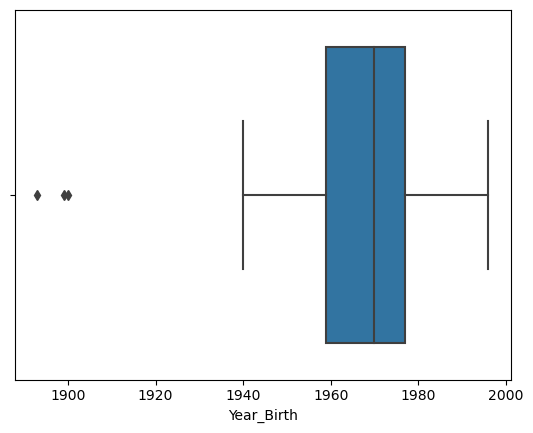

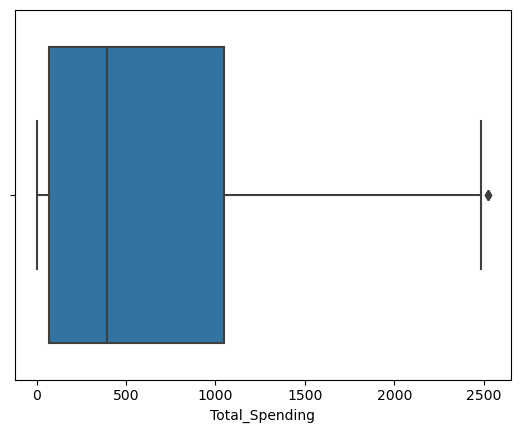

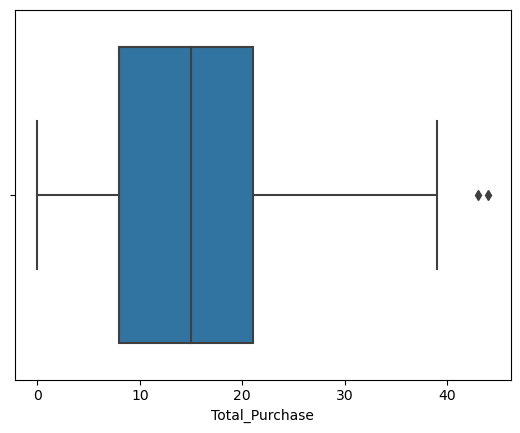

In [20]:
# Plotting boxplot for Year_Birth, Total_Spending, Total_Purchase

cols=['Year_Birth','Total_Spending','Total_Purchase']
for i in cols:
    sns.boxplot(x=df[i])
    plt.show()

**Observations:**
- Its clearly visible that some users have birth yearas <=1900. It's highly unlikely that the person is still alive. So it may be a reporting error.
- There are some outliers in total spending and total purchase. 
- The observations marked as outliers are very closed to the upper whisker and some extreme points can be expected for variables like total spending. Lets leave these outliers untreated. 

Let's check the number of observations for which year birth is less than 1900. 

In [21]:
df[df['Year_Birth'] < 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,new_income,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
513,11004,1893,Master,Single,"$60,182.00",0,1,5/17/14,23,8,...,0,0,0,0,SA,60182.0,22,4,1,0
827,1150,1899,PhD,Together,"$83,532.00",0,0,9/26/13,36,755,...,0,0,0,0,SP,83532.0,1853,15,0,1


**Observation**:
- There are only 2 observations for which birth year is less than 1900. We can drop these observations.

In [22]:
#keeping data for customers having birth year >1900

df = df[df['Year_Birth'] > 1900]

### Check the outliers and impute the missing values for the Income variable

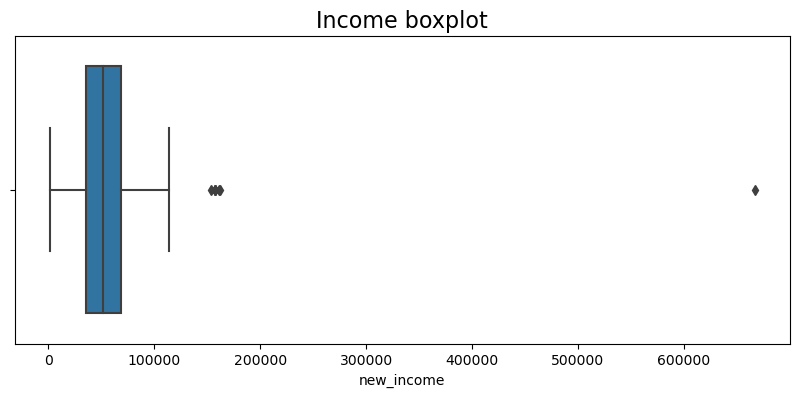

In [23]:
#plotting Boxplot for income

plt.figure(figsize=(10,4))
sns.boxplot(df['new_income'])
plt.title('Income boxplot', size=16)
plt.show()

**Observations:**

- We can see from the boxplot that there are some outliers in the income variable.
- Let's find the value at upper whisker to check how many observations are marked as outliers.


In [24]:
#Calculating the upper whisker for the Income variable

Q1 = df.quantile(q=0.25) #First quartile
Q3 = df.quantile(q=0.75) #Third quartile
IQR = Q3 - Q1            #Inter Quartile Range

upper_whisker = (Q3 + 1.5*IQR)['new_income']   #Upper Whisker
print("Upper whisker value is: ",upper_whisker)

Upper whisker value is:  118348.5


#### Checking the observations marked as outliers

In [25]:
df[df.new_income>upper_whisker][['ID','Total_Spending','Total_Purchase','NumberofChildren','TotalCampaignsAcc']]

,ID,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
325,4931,1730,28,0,0
497,1501,1717,44,0,0
527,9432,62,11,1,0
731,1503,107,1,2,0
853,5336,59,2,1,0
1826,5555,6,0,0,0
1925,11181,8,0,0,0
2204,8475,1608,37,1,0


**Observations**: 

- There are 8 observations with an income greater than the upper whisker. 
- 3 observations (ID- 4931, 1501, 9432, 8475) have purchased 11 or more times in the last 2 years.
- Other observations have less number of purchases.

**Let's compare the summary statistics for these observations with observations on the other side of the upper whisker.**

In [26]:
#Checking the summary statistics for observations marked as outliers
df[df.new_income>upper_whisker].describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,new_income,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
count,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.0,8.0,8.0,8.0,8.0,8.000000,8.000000,8.000000,8.000000,8.0
mean,5989.250000,1972.500000,0.375000,0.25000,48.625000,26.500000,4.500000,621.875000,4.250000,1.250000,...,0.0,0.0,0.0,0.0,0.0,221604.500000,662.125000,15.375000,0.625000,0.0
std,3525.251308,10.028531,0.517549,0.46291,33.687376,30.798887,6.524678,846.511402,5.650537,0.886405,...,0.0,0.0,0.0,0.0,0.0,179850.404431,848.380884,18.220377,0.744024,0.0
min,1501.000000,1949.000000,0.000000,0.00000,13.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,153924.000000,6.000000,0.000000,0.000000,0.0
25%,4074.000000,1972.500000,0.000000,0.00000,22.500000,1.750000,1.000000,7.250000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,157090.500000,46.250000,0.750000,0.000000,0.0
50%,5445.500000,1975.500000,0.000000,0.00000,34.000000,14.500000,1.000000,17.000000,2.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,157488.000000,84.500000,6.500000,0.500000,0.0
75%,8714.250000,1977.000000,1.000000,0.25000,82.000000,43.000000,5.000000,1592.000000,3.500000,1.250000,...,0.0,0.0,0.0,0.0,0.0,161201.500000,1635.250000,30.250000,1.000000,0.0
max,11181.000000,1982.000000,1.000000,1.00000,98.000000,85.000000,16.000000,1725.000000,17.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,666666.000000,1730.000000,44.000000,2.000000,0.0


In [27]:
#Checking the summary statistics for observations not marked as outliers
df[df.new_income<upper_whisker].describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,new_income,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,5585.439456,1968.904308,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,...,0.073016,0.064399,0.013605,0.15102,0.009070,51622.094785,606.821769,14.887982,0.948753,0.450340
std,3247.546423,11.705801,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,...,0.260222,0.245518,0.115872,0.35815,0.094827,20713.063826,601.675284,7.615277,0.749231,0.894075
min,0.000000,1940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,1730.000000,5.000000,0.000000,0.000000,0.000000
25%,2815.000000,1959.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,35196.000000,69.000000,8.000000,0.000000,0.000000
50%,5455.000000,1970.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,51287.000000,397.000000,15.000000,1.000000,0.000000
75%,8418.000000,1977.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,68281.000000,1047.000000,21.000000,1.000000,1.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,113734.000000,2525.000000,43.000000,3.000000,5.000000


**Observations**:

- None of the outliers have accepted any of the campaigns or have submitted any complaints in the last 2 years.
- Customers who are outliers have lower mean expenditure for all the products except for meat products.
- The outliers have a higher number of catalog purchases on average and very low number of web purchases.
- We can drop the outliers at indices [527, 731, 853, 1826, 1925] as they add no value to our analysis and also have very less total Spend.

In [28]:
#Dropping 5 observations at indexes 527, 731, 853, 1826, 1925  
df.drop(index=[527, 731, 853, 1826, 1925], inplace=True)

### Check the distribution for Income

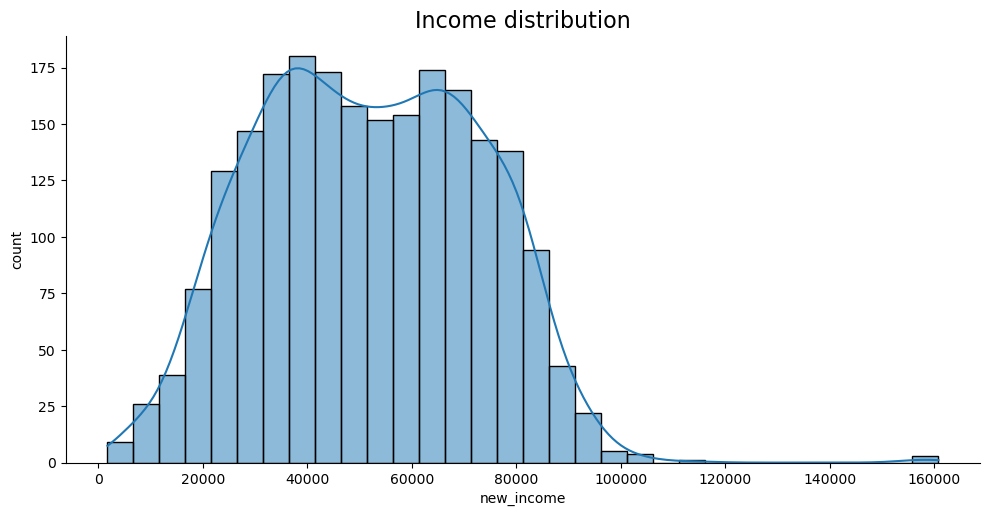

In [29]:
#plotting displot for income

#uncomment the lines of code given below
sns.displot(df['new_income'], kde=True, height=5, aspect=2)
plt.title('Income distribution', size=16, )
plt.ylabel('count');

**Observations:**

- After treating outliers, the distribution for the income variable is close to normal distribution with very few extreme observations to the right.
- We will replace the missing values for the income variable with the median, and not mean, as the variable is slightly skewed to the right

In [13]:
#filling null values with median

df['new_income'].fillna(df.new_income.median(), inplace=True)

### Analyzing all the campaigns

#### Let's find out what is the acceptance rate for each campaign?

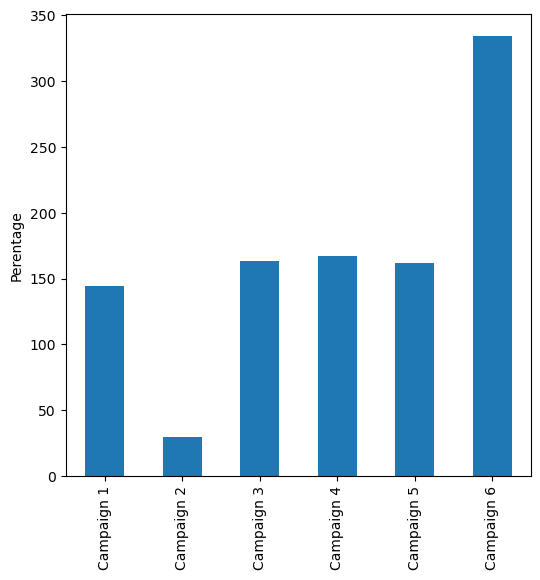

In [99]:
# PLotting the % acceptance for every campaign

Camp_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

success_campaign=(df[Camp_cols].mean())*100


# plot
success_campaign.plot(kind='bar', figsize=(6,6))
plt.ylabel("Perentage")
labels= ['Campaign 1', "Campaign 2","Campaign 3", "Campaign 4", "Campaign 5", "Campaign 6"]
y_pos = np.arange(len(labels))
plt.xticks(y_pos,labels)
plt.show()


**Observations:**
- The acceptance rates are as follows: 
- Campaign 1 is around 6.3%
- Campaign 2 is around 1.4% 
- Campaign 3 is around 7.3% 
- Campaign 4 is around 7.5% 
- Campaign 5 is around 7.2% 
- Campaign 6 is around 14.5% 

### Let's analyze what kind of customer are accepting campaigns?

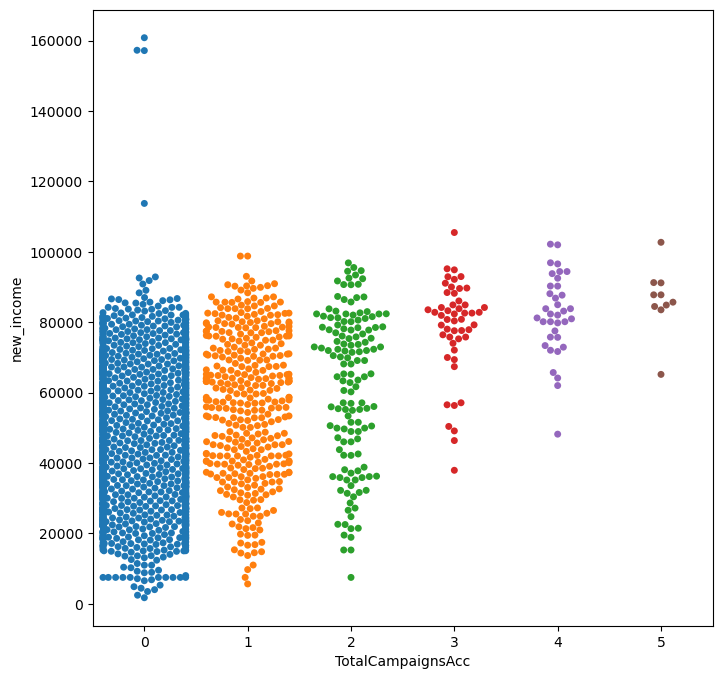

In [31]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='TotalCampaignsAcc', y='new_income', data=df)
plt.show()

**Observations:**
- Mostly people with higher incomes are accepting the campaigns.

In [32]:
# Let's see the mean income of customers
df.new_income.mean()

51767.16983695652

### The mean income of customers is close to 52K. Let's divide the income into 2 segments of income>52k and income<52k and see the acceptance rate in each segment.

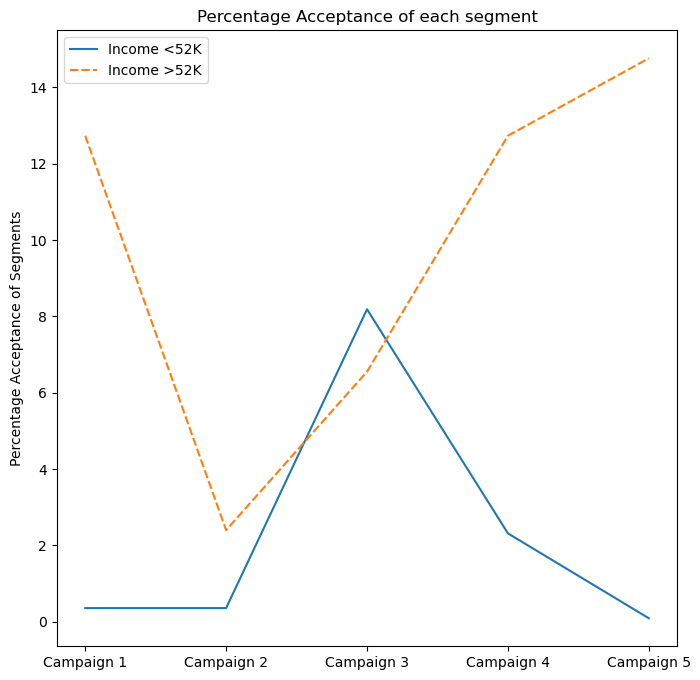

In [37]:
# making dataframes of customers having income <52k and >52K
df1 = df[df.new_income<52000]
df2 = df[df.new_income>52000]

# Camp_cols is all campaign columns
Camp_cols =['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

#Calculating acceptance rate of each campaing for both segments 

segment1_acceptance=pd.DataFrame(df1[Camp_cols].mean()*100, columns=['Income <52K'])

segment2_acceptance=pd.DataFrame(df2[Camp_cols].mean()*100, columns=['Income >52K'])

new_df = pd.concat([segment1_success, segment2_success], axis=1)

# plot

plt.figure(figsize=(8,8))
sns.lineplot(data = new_df)
plt.title("Percentage Acceptance of each segment")
plt.ylabel("Percentage Acceptance of Segments")

labels= ['Campaign 1', "Campaign 2","Campaign 3", "Campaign 4", "Campaign 5"]
y_pos = np.arange(len(labels))
plt.xticks(y_pos,labels)


plt.show()

In [39]:
segment2_acceptance.mean()

Income >52K    9.833948
dtype: float64

In [38]:
segment1_acceptance.mean()

Income <52K    2.259786
dtype: float64

**Observations:**

- The acceptance rate of customers in the lower income segment are around 2.3% with Campaign 3 having most acceptance of 8.2%. 

- The acceptance rate of customers in the higher income segment are around 9.8% with Campaign 5 having highest rate (14%) 

### Let's find which group liked which campaign

In [175]:
new_df = df[df['Response']==1]

In [176]:
new_df.shape

(334, 33)

- There are only 334 customers who have accepted the last campaign.
- Let's look if income has anything to do with campaigns response. I have created a grouped bar graph showing campaigns accepts by customers based on their income group

In [174]:
# Camp_cols =['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
# plt.figure(figsize=(8,8))
# new_df1 = new_df[new_df.new_income>52000]
# new_df2 = new_df[new_df.new_income<52000]

# new_df1=(new_df1[Camp_cols].sum())
# new_df2=(new_df2[Camp_cols].sum())

# # plot
# # new_df1.plot(kind='bar', figsize=(6,6))
# plt.bar(Camp_cols, new_df1[Camp_cols])
# plt.bar(Camp_cols, new_df2[Camp_cols])

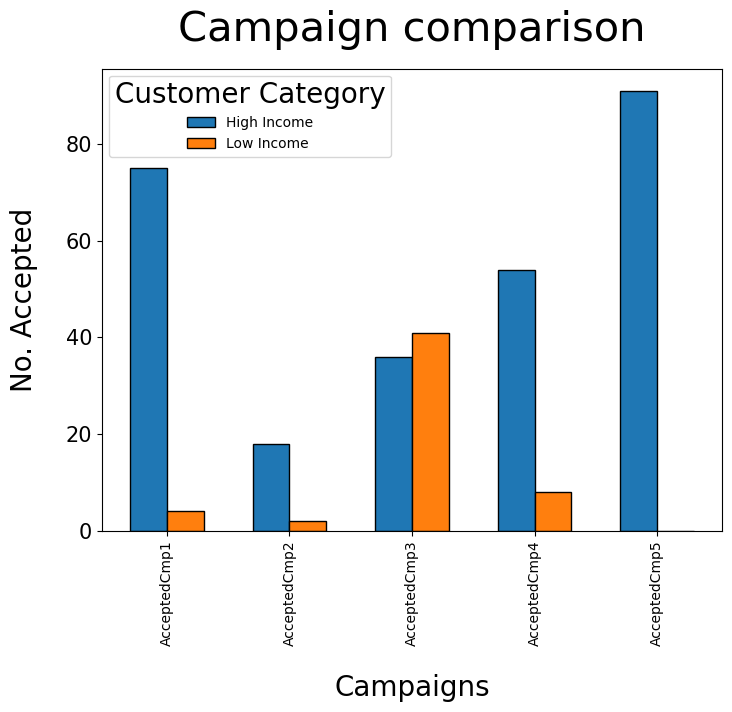

In [182]:
#use fivethirty eights style of plots

# plt.style.use("fivethirtyeight")
plt.style.use("default")

#create the base axis to add the bars to
fig, ax = plt.subplots(1,1, figsize = (8,6))

#extract the labels
label = Camp_cols

#use this to create x ticks to add the data to
x = np.arange(len(label))

#set a width for each bar 
width = 0.3

#create out first bar
#set it so that x will be the centre of the bars
#so that we can add our labels later
#so set the centre of the first to be 1/2 width away
#to the left
rect1 = ax.bar(x - width/2,
              new_df[new_df.new_income>52000][Camp_cols].sum(),
              width = width, 
               label = 'High Income',
               edgecolor = "black"
              )
#create the second bar
#with a centre half a width to the right
rect2 = ax.bar(x + width/2,
              new_df[new_df.new_income<52000][Camp_cols].sum(),
              width = width,
              label = 'Low Income',
              edgecolor = "black")
#add the labels to the axis
ax.set_ylabel("No. Accepted",
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("Campaigns",
             fontsize = 20,
             labelpad =20)
ax.set_title("Campaign comparison",
            fontsize = 30,
            pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
#using the labels of the bars
ax.legend(title = "Customer Category",
         fontsize = 10,
         title_fontsize = 20)
#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 15)

- Clearly some bias is present in the type of responses by customers based on their income.
Seems like customers with higher income mostly accepted the campaign in comparison to the low income group
- This case is contradicted in Campaign 3 as Low income group accepted it more than the high income group

In [179]:
# Camp_cols =['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
# plt.figure(figsize=(8,8))
# new_df1 = new_df[new_df.new_income<52000]
# new_df1=(new_df1[Camp_cols].sum())

# # plot
# new_df1.plot(kind='bar', figsize=(6,6))

**Observations:**
- We know that the maximum number of campaigns any customer has accepted is 5.
- We can observe that the value for TotalCampaignsAcc is ~1.98 for customers who have accepted the last campaign.
- This implies that these 19 customers are those loyal customers who have been accepting most of the campaigns.

### It could be that different campaigns are focussed on different set of products. Let's check if the product preference for those who accepted the campaigns is different from those who didn't - using amount spent and number of purchases

Let's define a function which will take the column name for the product as input and will generate the barplot for every campaign and average amount spent on a product

In [39]:
Camp_cols= ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
def amount_per_campaign(columns_name):
    p1=pd.DataFrame(df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    p2=pd.DataFrame(df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    p3=pd.DataFrame(df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    p4=pd.DataFrame(df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    p5=pd.DataFrame(df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    p6=pd.DataFrame(df.groupby(['Response']).mean()[columns_name]).T
    pd.concat([p1,p2,p3,p4,p5,p6],axis=0).set_index([Camp_cols]).plot(kind='line', figsize=(8,8))
    plt.ylabel('Average amount spend on' + ' ' + columns_name)
    
    labels= ['Campaign 1', "Campaign 2","Campaign 3", "Campaign 4", "Campaign 5", "Campaign 6"]
    y_pos = np.arange(len(labels))
    plt.xticks(y_pos,labels)

    plt.show()
    print("Average amount spent on "+columns_name+" is ",np.mean([p1, p2, p3, p4, p5, p6]))

#### Use the function defined above to generate barplots for different purchasing Products

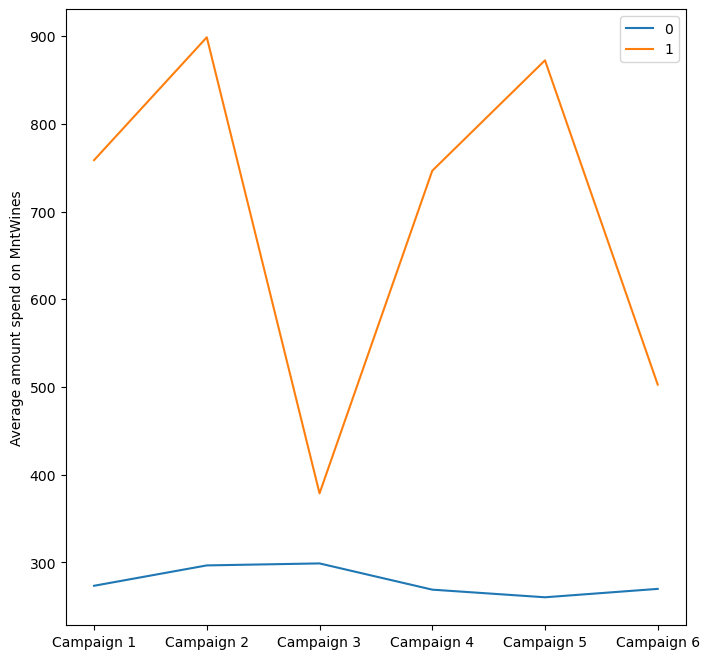

Average amount spent on MntWines is  485.413978642991


In [40]:
#here is an example showing how to use this fuction on the column MntWines
amount_per_campaign('MntWines')

**Observations:**
- For the customers accepting campaign 2, 4 and 5, the average amount spent on wine is quite high.

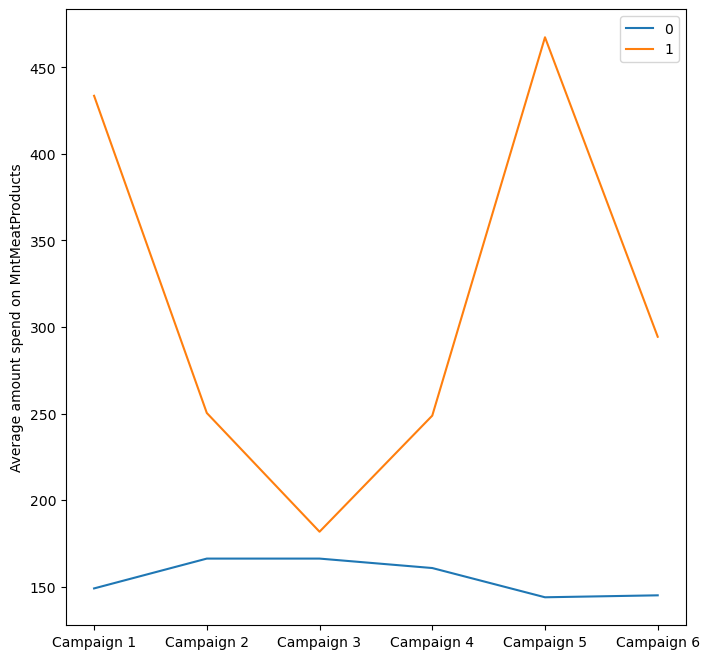

Average amount spent on MntMeatProducts is  233.89398296823074


In [41]:
#meat products

amount_per_campaign('MntMeatProducts')

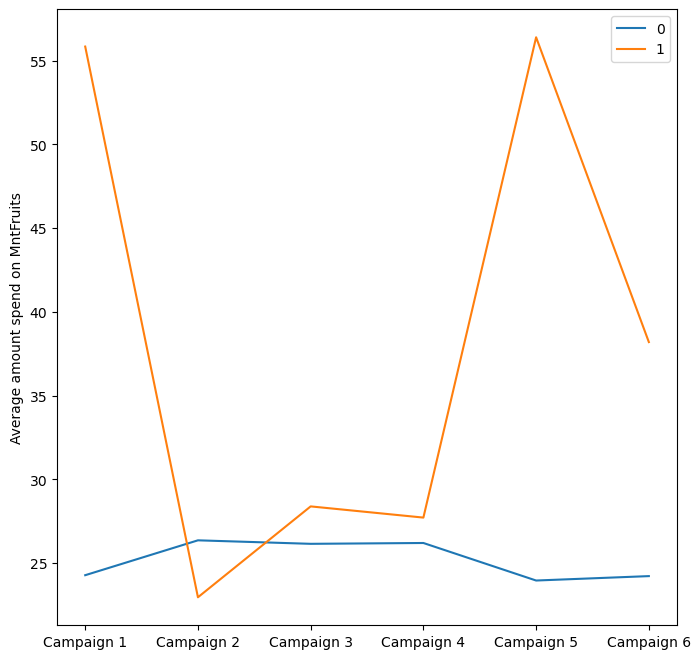

Average amount spent on MntFruits is  31.729249475579937


In [42]:
# Fruit products


amount_per_campaign('MntFruits')

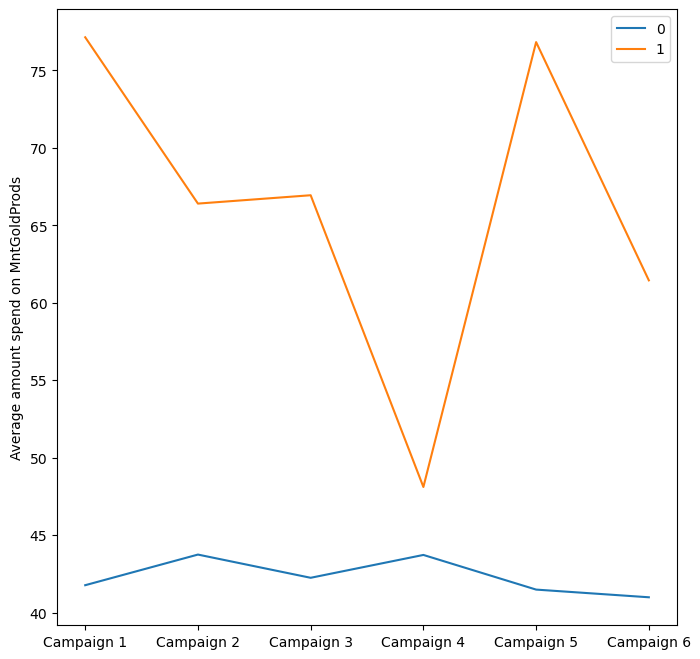

Average amount spent on MntGoldProds is  54.23746224091033


In [43]:
# gold products


amount_per_campaign('MntGoldProds')

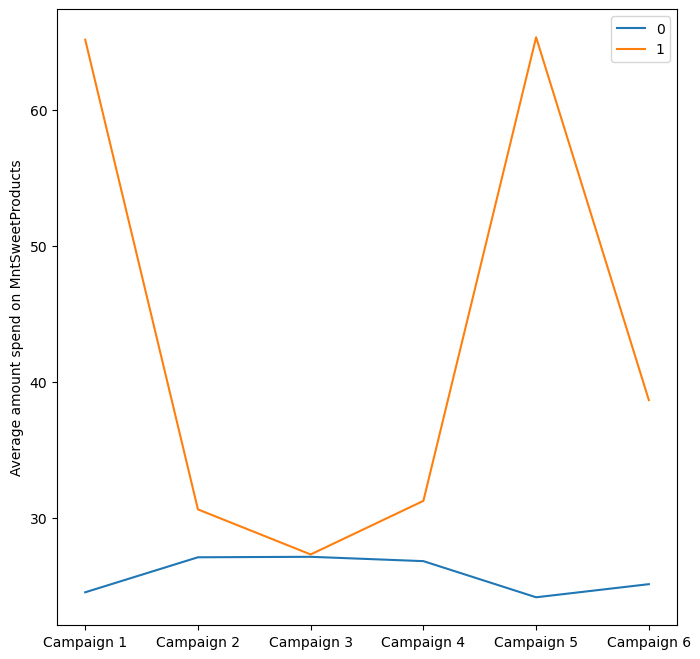

Average amount spent on MntSweetProducts is  34.41199647675505


In [44]:
#sweet products


amount_per_campaign('MntSweetProducts')

**Observations:**

- For the customers accepting campaigns 2, 4 and 5, the average amount spent on meat is very high. In addition, for the customers accepting campaign 5, the average amount spent on meat is around 500.

- For the customers accepting campaigns 3 and 5, the average amount spent on fruits is very high with 5th being above 55.

- For the customers accepting campaigns 1, 2, 3 and 6, the average amount spent on gold is high with 1st and 5th being around 78.

- For the customers accepting campaigns 1 and 5, the average amount spent on sweet is very high, above 65. On the other hand, the average amount spent on sweets is relatively low for the customers accepting campaigns 2, 3 and 4.

### We have analyzed the relationship between campaigns and different products. Now, let's see the relationship of campaigns with different purchasing channels.

We have a defined a function which will take the column name of the channel name as input and will generate the barplot for every campaign and average purchase made through that channel if the campaign is accepted

In [45]:
Camp_cols= ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
def Purchases_per_campaign(columns_name):
    dp1=pd.DataFrame(df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    dp2=pd.DataFrame(df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    dp3=pd.DataFrame(df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    dp4=pd.DataFrame(df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    dp5=pd.DataFrame(df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    dp6=pd.DataFrame(df.groupby(['Response']).mean()[columns_name]).T
    pd.concat([dp1,dp2,dp3,dp4,dp5,dp6],axis=0).set_index([Camp_cols]).plot(kind='line', figsize=(8,8))
    plt.ylabel('Average' + ' ' + columns_name)
    
    labels= ['Campaign 1', "Campaign 2","Campaign 3", "Campaign 4", "Campaign 5", "Campaign 6"]
    y_pos = np.arange(len(labels))
    plt.xticks(y_pos,labels)
    
    plt.show()
    
    print("Average amount spent in "+columns_name+" is ",np.mean([dp1, dp2, dp3, dp4, dp5, dp6]))

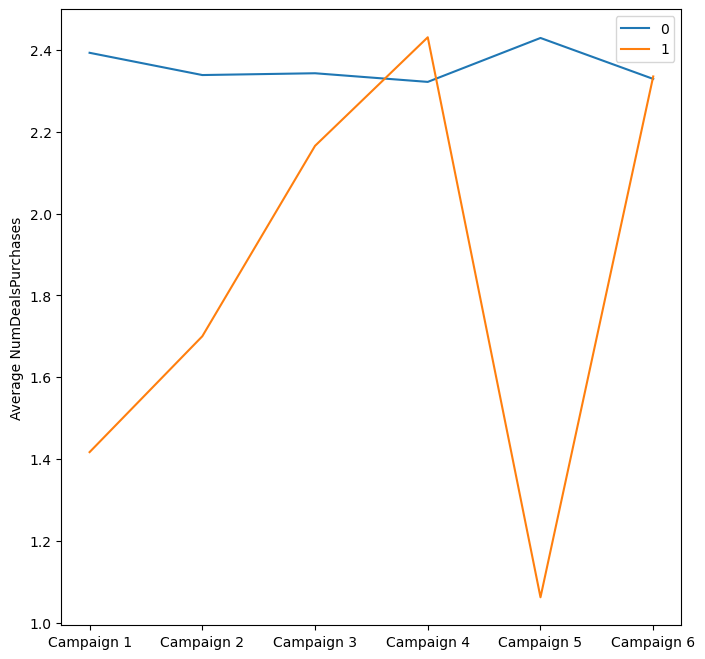

Average amount spent in NumDealsPurchases is  2.1055371580033557


In [46]:
#here is an example showing how to use this fuction on the column NumDealsPurchases
Purchases_per_campaign('NumDealsPurchases')

**Observations:**
- Its a great observation that the average deals purchase is really high for customers that did not accept the campaign.
- For the customers accepting campaign 1 and 5, the average deals purchase is quite low.

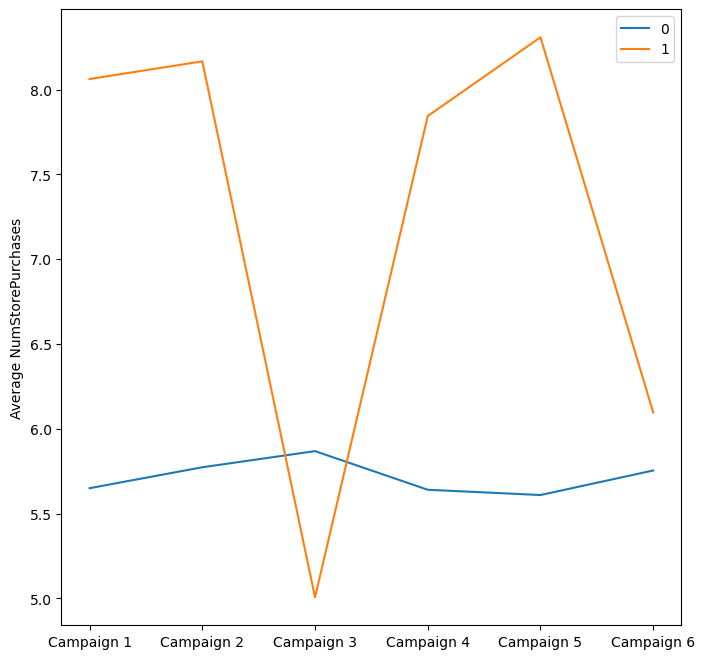

Average amount spent in NumStorePurchases is  6.481483210949269


In [47]:
# store purchase

Purchases_per_campaign('NumStorePurchases')

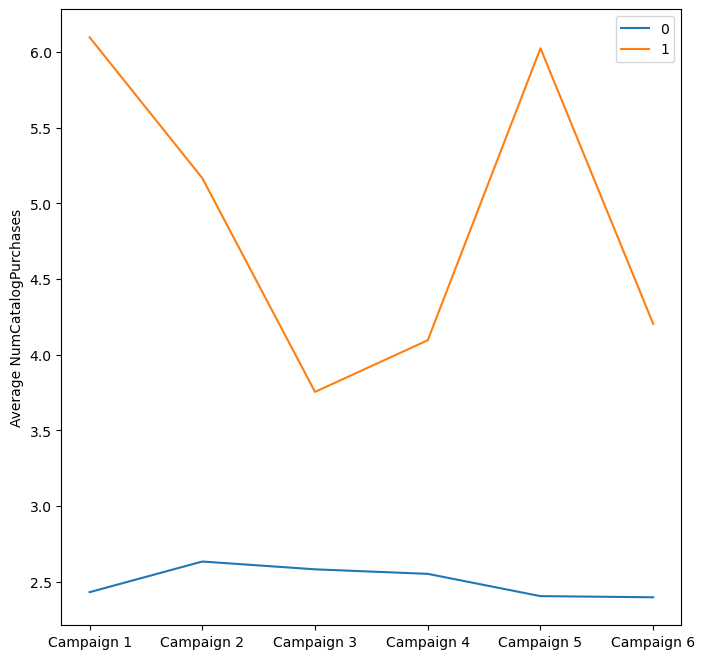

Average amount spent in NumCatalogPurchases is  3.6955096406038623


In [48]:
#Catalog purchase


Purchases_per_campaign('NumCatalogPurchases')

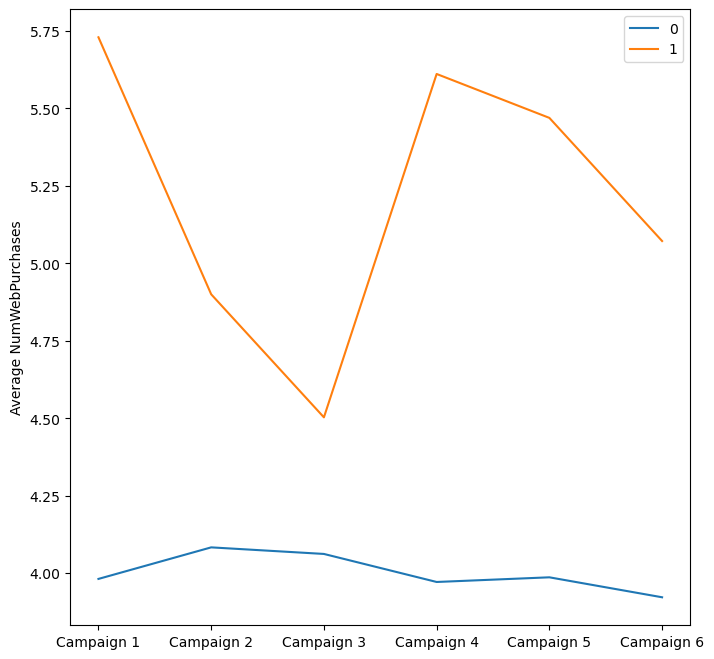

Average amount spent in NumWebPurchases is  4.60776118487201


In [49]:
#Web purchases


Purchases_per_campaign('NumWebPurchases')

**Observations:**

- For the customers accepting campaign 1, 2, 4 and 5 the average store  purchase is very high.

- For the customers accepting campaign 1 and 5 the average catalog purchase is very high, around 6. Besides, for the customers accepting campaign 3, 4 and 6, the average catalog purchase is between 3.5 and 4. As we can see from the above plot, the customers 2, the average catalog purchase is above 5.

- For the customers accepting campaigns 1, 2, 3, 4, 5, and 6, the average purchase made through the company's website is above 4.50. In addition, we can see from the above plot that for the customers accepting campaigns 1, 3 and 5, the average purchase made through the company's website is relatively high.


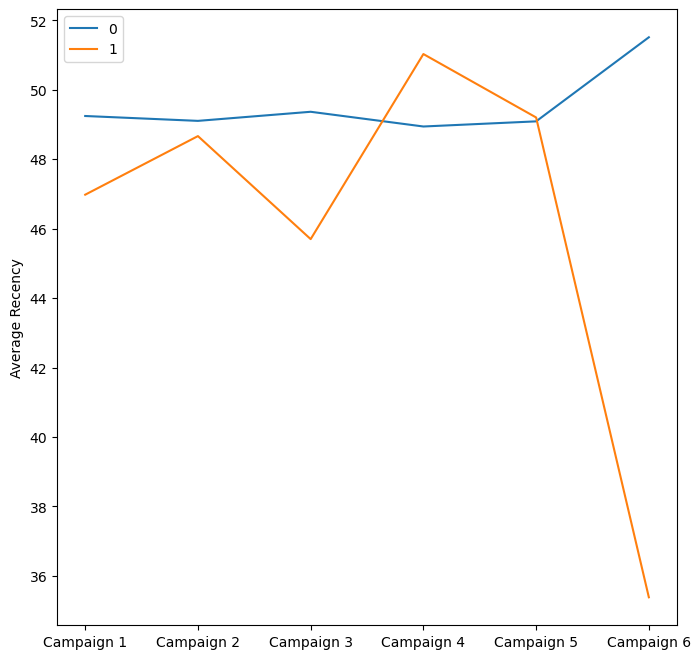

The average earliest order is made by a customer in around  48  days 


In [50]:
#Recency

def Purchases_per_campaign(columns_name):
    dp1=pd.DataFrame(df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    dp2=pd.DataFrame(df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    dp3=pd.DataFrame(df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    dp4=pd.DataFrame(df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    dp5=pd.DataFrame(df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    dp6=pd.DataFrame(df.groupby(['Response']).mean()[columns_name]).T
    pd.concat([dp1,dp2,dp3,dp4,dp5,dp6],axis=0).set_index([Camp_cols]).plot(kind='line', figsize=(8,8))
    plt.ylabel('Average' + ' ' + columns_name)
    
    labels= ['Campaign 1', "Campaign 2","Campaign 3", "Campaign 4", "Campaign 5", "Campaign 6"]
    y_pos = np.arange(len(labels))
    plt.xticks(y_pos,labels)
    
    plt.show()
    a=np.mean([dp1, dp2, dp3, dp4, dp5, dp6])
    print(f"The average earliest order is made by a customer in around ",round(a), " days ")

Purchases_per_campaign('Recency')

**Observations:**
- Average recency of the customers who accepted campaign 3 is quite low which implies that campaign 3 was accepted by the customers who recently purchased an item. 

#### We have analyzed the relationship between campaigns and numerical variables. Let's see the relationship of campaigns with different categorical variables

We will check the percentage acceptance of each campaign with respect to each category in the categorical variable. The percentage acceptance is calculated as number of customers who have accepted the campaign to the total number of customers.

In [16]:
def Cat_Campaign_Relation(df, column_name):
    e1=df.groupby([column_name])['AcceptedCmp1'].mean()
    e2=df.groupby([column_name])['AcceptedCmp2'].mean()
    e3=df.groupby([column_name])['AcceptedCmp3'].mean()
    e4=df.groupby([column_name])['AcceptedCmp4'].mean()
    e5=df.groupby([column_name])['AcceptedCmp5'].mean()
    e6=df.groupby([column_name])['Response'].mean()
    
    df_new=pd.concat([e1,e2,e3,e4,e5,e6],axis=1).T
    plt.figure(figsize=(8,8))
    sns.lineplot(data=df_new, markers=True, linewidth=2)
    plt.ylabel('Percentage Acceptance')
    plt.show()

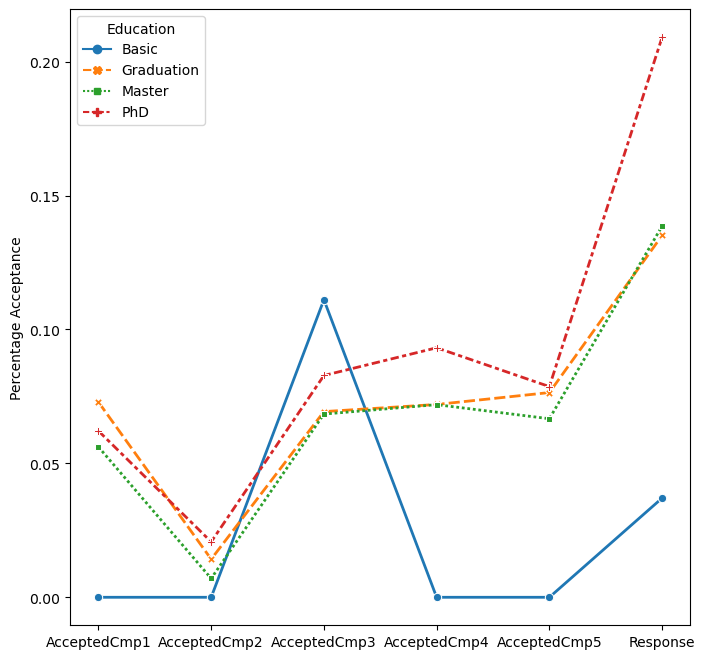

In [52]:
#here is an example showing how to use this fuction on the column Education
Cat_Campaign_Relation(df, 'Education')

**Observations:**

- More than 20% of the customers with Ph.D have accepted the last campaign.
- Customers with basic education have only accepted campaign 3 and 6.
- Except customers with basic education level, all education levels follow the same trend.

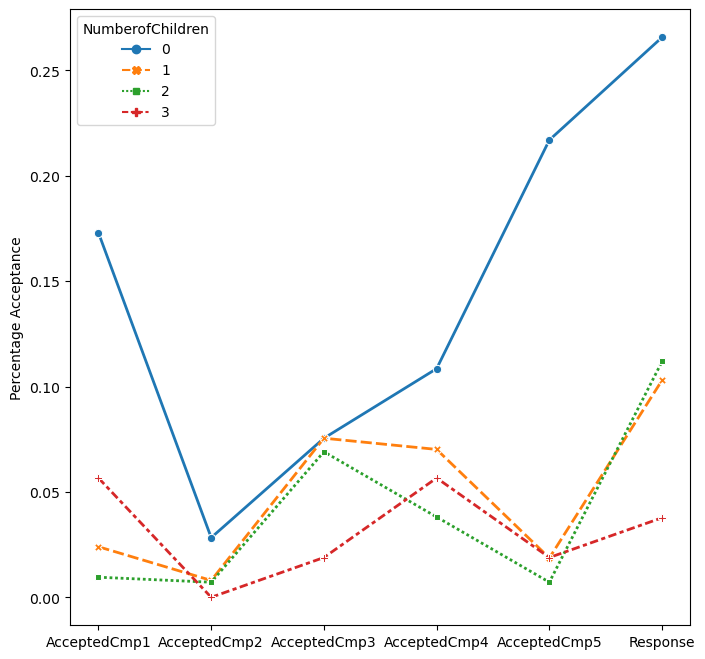

In [17]:
#NumberofChildren


Cat_Campaign_Relation(df, 'NumberofChildren')

<AxesSubplot:ylabel='Marital_Status'>

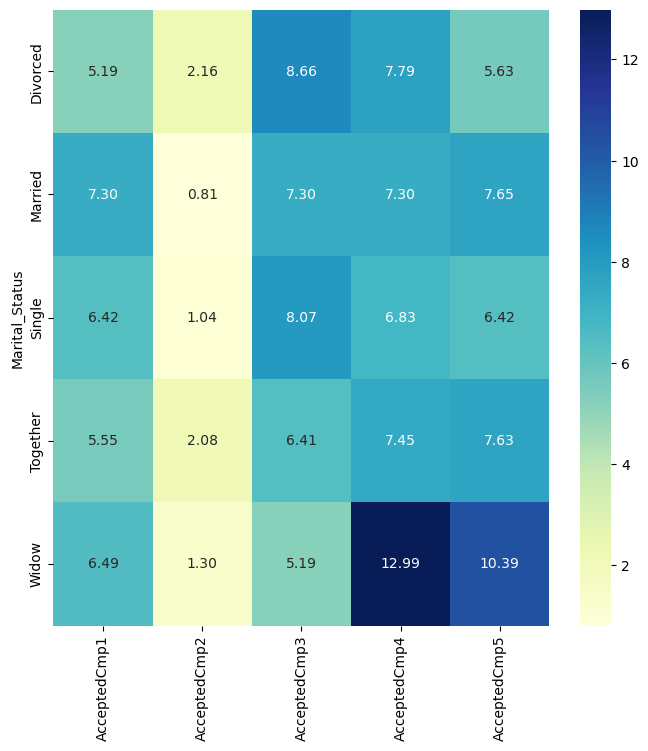

In [412]:
#Let's filter the observations with 'Others' category as they are only 4 such observations
df_rest=df[df.Marital_Status!='Others']


plt.figure(figsize=(8,8))
# sns.heatmap((df_rest.groupby('Marital_Status').sum()[Camp_cols]/df_rest.groupby('Marital_Status').count()[Camp_cols])*100, annot=True, fmt='0.2f', cmap="YlGnBu")


sns.heatmap(( df_rest.groupby('Marital_Status')[Camp_cols].mean())*100, annot=True, fmt='0.2f', cmap="YlGnBu")

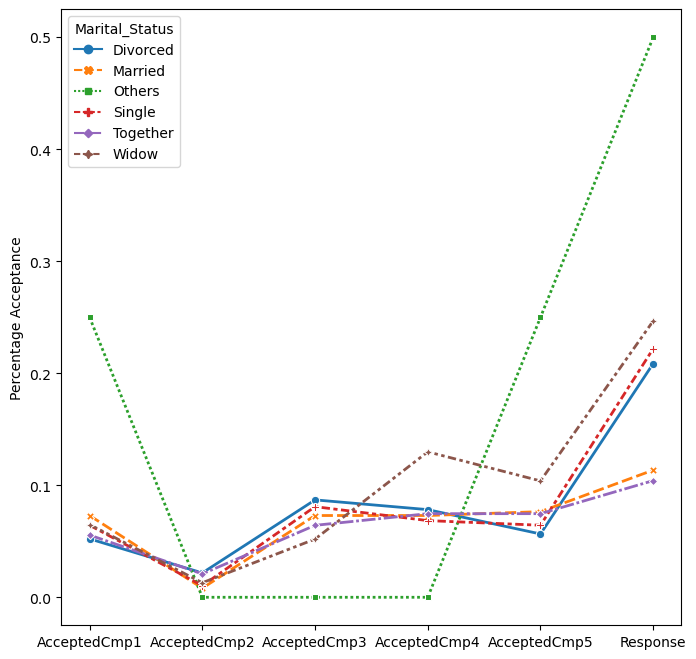

In [55]:
Cat_Campaign_Relation(df, 'Marital_Status')

<AxesSubplot:ylabel='Country'>

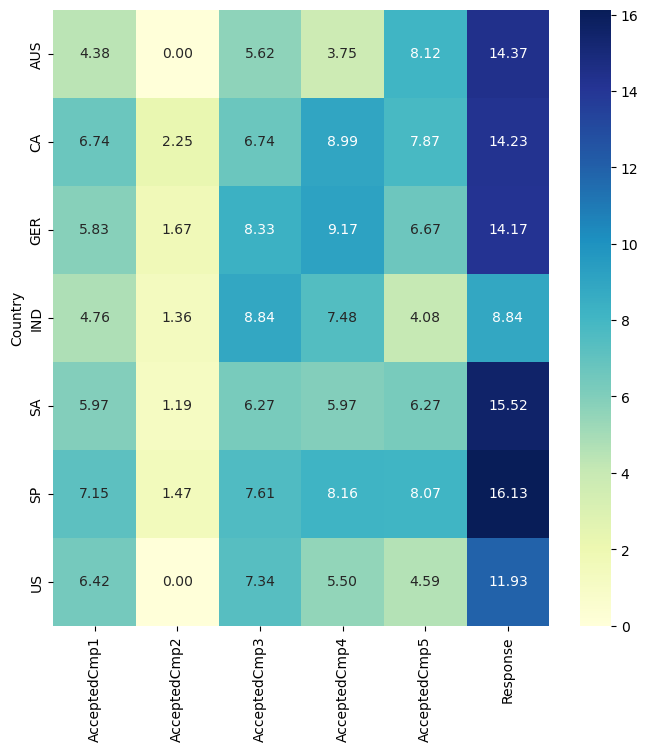

In [56]:
#Let's filter the observations for 'ME' country as they are only 3 such observations
df_not_mexico=df[df.Country!='ME']

#Plot
plt.figure(figsize=(8,8))
sns.heatmap((df_not_mexico.groupby('Country')[Camp_cols].mean())*100, annot=True, fmt='0.2f', cmap="YlGnBu")

**Observation:**

- The customers with no children have accepted most of the campaigns with highest acceptance of the last one. 

- The customers with 3 children also show a good acceptance rate and show similar trait to the customers with 1 and 2 children.

- Customers with marital status Divorced and Together started accepting campaign from 4 and kept increasing even for 5 and 6.

- The accepted rate for campaign 6 is the highest among all the marital statuses. 

- The accepted rate for the campaign 2 is the lowest among all the countries. The customers in US have 0 for campaign 2 which is the lowest. Besides, the accepted rate for campaign 6 is the highest among all the listed countries. 


### Check the product preferences by customers

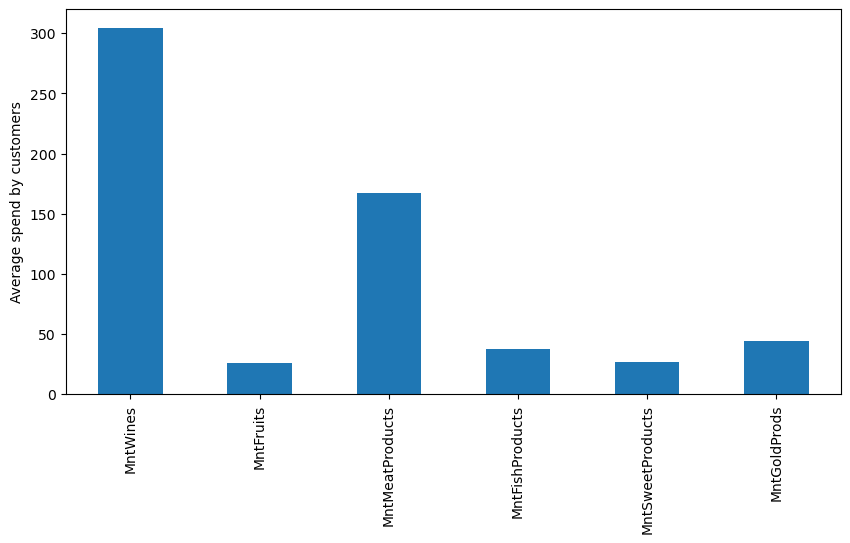

In [57]:
#creating a list which contain all the columns name of products

mnt_cols = [col for col in df.columns if 'Mnt' in col]

spending=df[mnt_cols].mean(axis=0)
spending.plot(kind='bar', figsize=(10,5))
plt.ylabel("Average spend by customers")
plt.show()

**Observations**:

- The mean amount spent by customers in the last 2 years is highest for wines followed by meat products.

Let's check if the product preferences are similar for different types of customers. We will calculate the percentage amount spent by customers on a product for each category with respect to the total spending by customers belonging to that category.

In [58]:
def amount_per_category(df, column_name):
    df_new1=((df.groupby([column_name]).sum()[mnt_cols].T)/df.groupby([column_name]).sum()['Total_Spending'])*100
    plt.figure(figsize=(10,8))
    sns.heatmap(df_new1.T, annot=True, cmap="YlGnBu")
    plt.show()

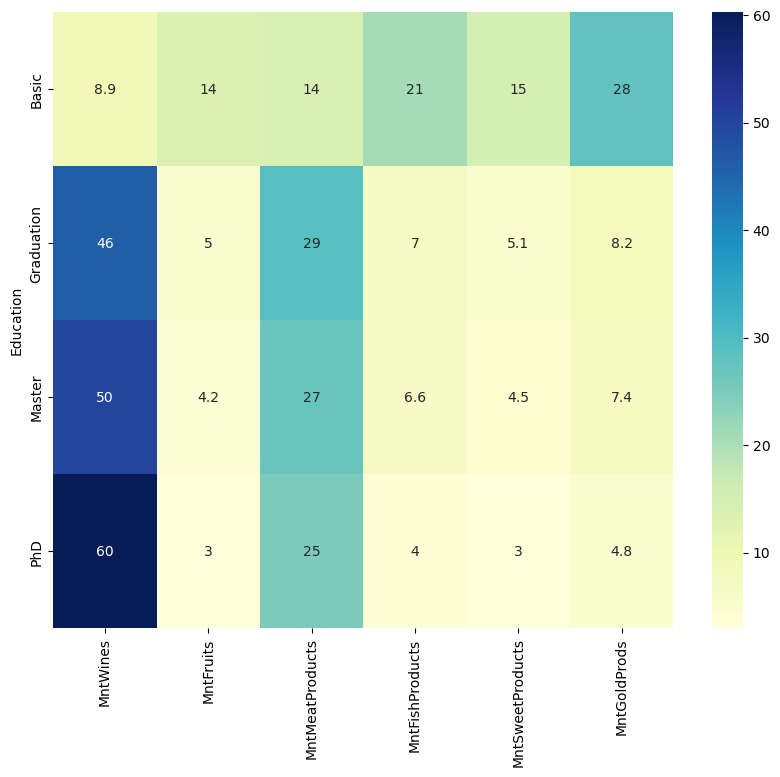

In [59]:
# plot showing the percentage of total spending of different products by a group of customers having same education level

amount_per_category(df, 'Education')

**Observations:**
- Customers with PhD spend ~60% of their total spending on wines.
- Customers with Graduation and Master's spend 45% and 50% of their total spending on wines respectively.
- Customers with Graduation and Master's spend 27% and 29% of their total spending on meat respectively.
- Customers having education level Master, Graduate and PhD spend around 70% only on meat and wines, which is not surprising.
- Customers with basic education spend max on Fish and Gold products.

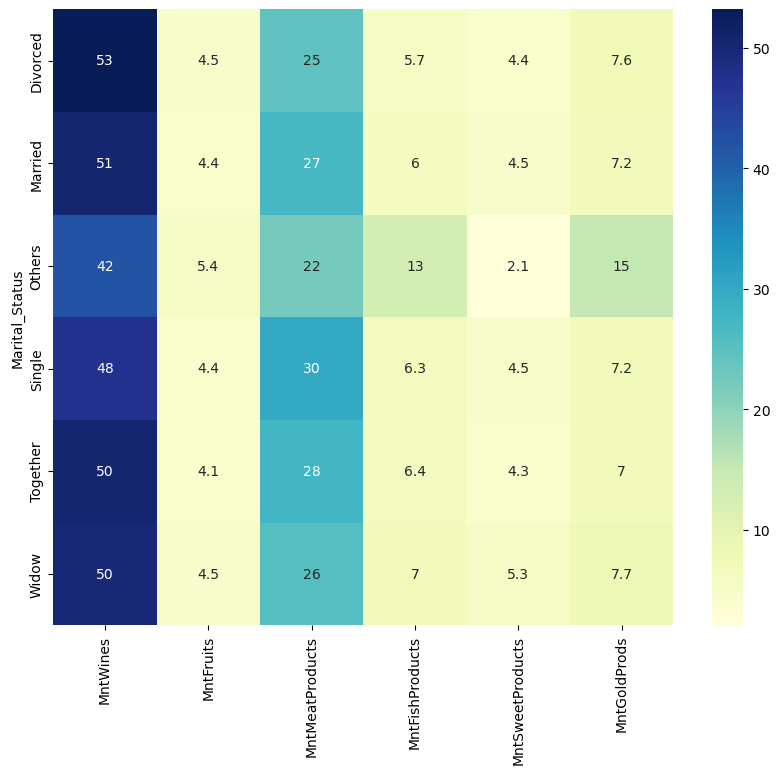

In [60]:

def amount_per_category(df, column_name):
    df_rest=((df.groupby([column_name]).sum()[mnt_cols].T)/df.groupby([column_name]).sum()['Total_Spending'])*100
    plt.figure(figsize=(10,8))
    sns.heatmap(df_rest.T, annot=True, cmap="YlGnBu")
    plt.show()
amount_per_category(df, 'Marital_Status')

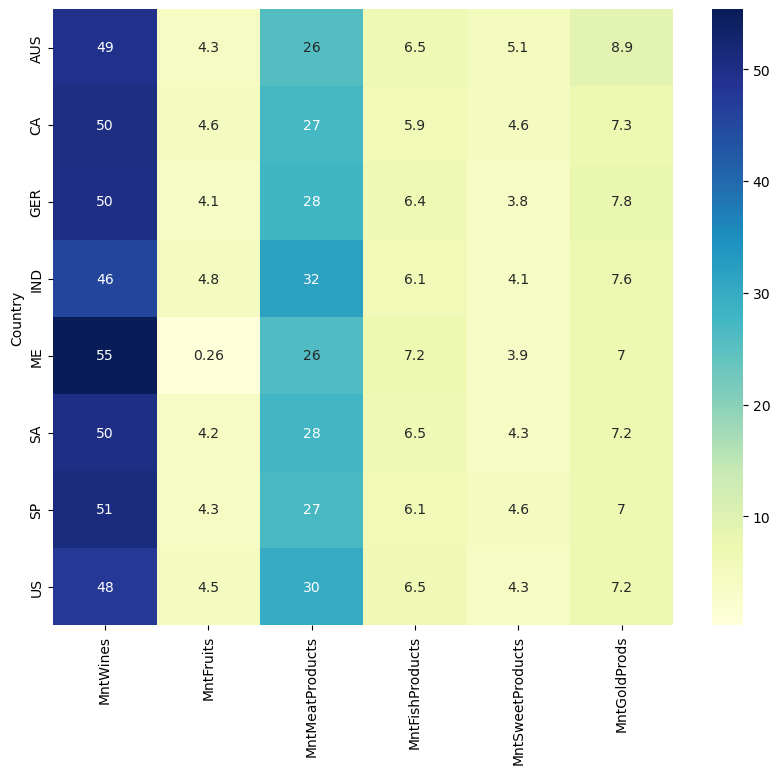

In [61]:

def amount_per_category(df, column_name):
    df_not_mexico=((df.groupby([column_name]).sum()[mnt_cols].T)/df.groupby([column_name]).sum()['Total_Spending'])*100
    plt.figure(figsize=(10,8))
    sns.heatmap(df_not_mexico.T, annot=True, cmap="YlGnBu")
    plt.show()
amount_per_category(df, 'Country')

**Observations:**

- Customers with any marital status spend between 42-53% of their spending on wines, which is the highest percentage compared to customers' spending on other products.

- Divorce customers spend 53% of their total spending on wines, which is the highest percentage of amount spend on wines among  customers with other marital statuses. 

- Together (marital status) customers spend the highest amount on 'meat' among all other statuses which is 28% of their spending 

- Customers from any listed countries spend between 46% and 55% of their spending on wines, which is the highest percentage compared to customer's spending on other products.

- Customers from the US spend 48% of their spending on wines and 30% on meat. 

- Customers from ME spend lowest on fruits i.e 0.2% in comparison to other countries.

- Customers from the AUS and GER spend about 9% and 8% on gold which is higher than most other countries. 

### Check different channel performances 

Let's calculate the percentage of purchases for all the channels.

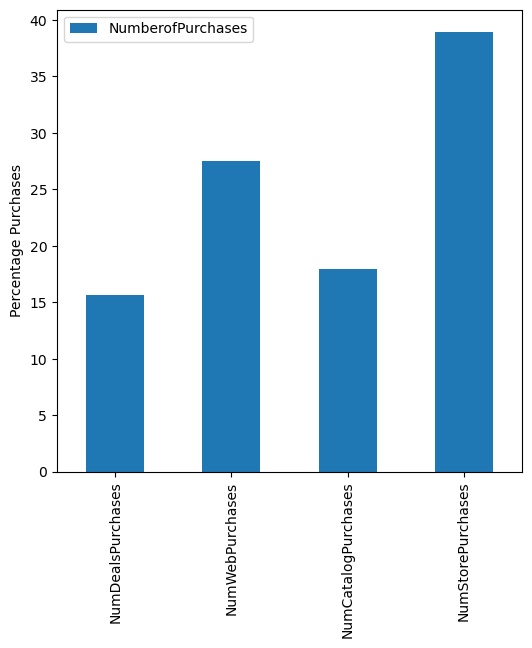

In [20]:
# list of cols for channels

channel_cols = [col for col in df.columns if 'Purchases' in col] 

#making dataframe of columns having purchase and taking sum of them.
channels = pd.DataFrame((df[channel_cols].sum()/df.Total_Purchase.sum())*100, columns=['NumberofPurchases'])

# plot
channels.plot(kind='bar', figsize=(6,6))
plt.ylabel("Percentage Purchases")
plt.show()

**Observations**:

- We can see that the most purchases are from the stores followed by web purchases.
- Number of deal purchases and catalog purchases are low.

Let's check how number of purchases via different channels varies for different income bins.

In [21]:
#Binning the income column

df['income_cat']=pd.qcut(df.new_income, q=[0, 0.25, 0.50, 0.75, 1], labels=['low', 'medium', 'high', 'very_high'])

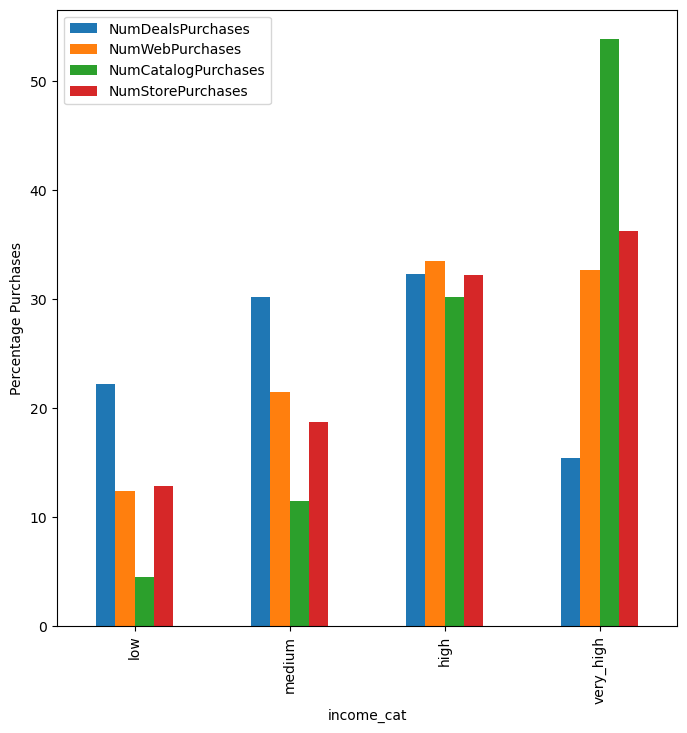

In [22]:
group=df.groupby('income_cat').sum()[channel_cols]
((group/group.sum()*100)).plot(kind='bar', figsize=(8,8))
plt.ylabel("Percentage Purchases")
plt.show()

**Observations:**

- Its visible that customers in the very high-income group made about 55% of their purchases through catalog (shipped through the mail) followed by the purchases in stores which are about 35%. 

- Low-income customers have more purchases made with discounts (about 22%) and have extremely low catalog purchases about (4.5%). 

- Medium income customers show the similar pattern to the Low income customers (more discount purchases and lesser catalog) but with higher percent of purchase for each type.

- High-income customers rank almost similar in terms of the numbers of purchases made via all 4 channels with 30% or above.

- HIgh income customers are also leading the Web purchase channel with about 34% Website purchace which is also the maximum purchased channel

- High and very high income customers are the type with more than 30% of the 'in stores" and 'company website' purchases. 


### Lets visualize the correlation by purchases from different channels and income of the customer.

<AxesSubplot:>

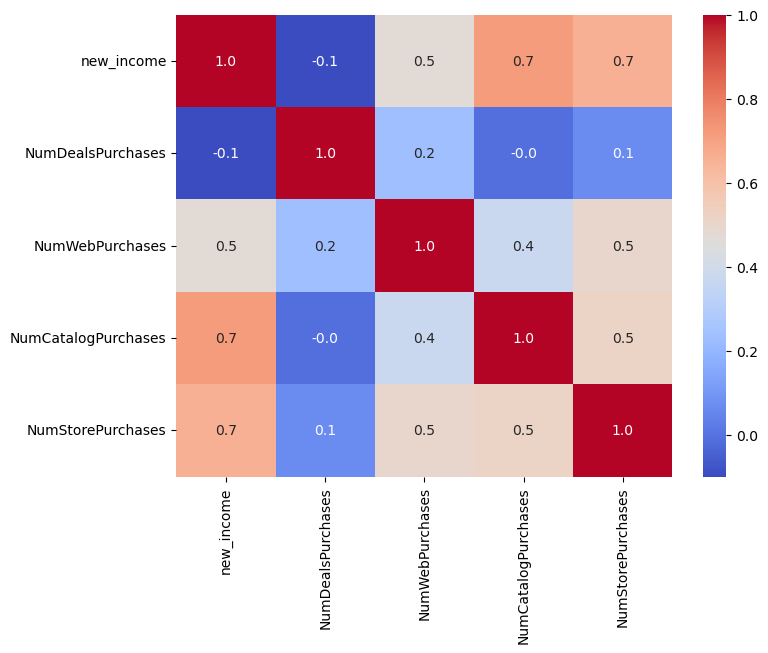

In [65]:
corr=df[['new_income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' ]].corr()


plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

**Observations:**

- Store purchases & Catalog purchases show a high positive correlation with customer income (both 0.7). The customers with high income are most likely to make the highest number of purchases via 'in stores' and 'catalog.'   

- Web purchases also has a positive correlation of 0.5 with the income. 

- Deal purchases has a negative correlation (-0.1) with the income.

- Catalog purchases has a positive correlation of 0.4 with the Web purchase showing that purchases through companies website are generally shipped by mail. 

- Catalog purchases has negative correlation with Deal purchases (-0.0) which means that materials that are shipped via mail dont really have deals or discounts on them leading to a negative correlation.

#### As we know from our analysis we have done so far that customers with income, number of children, and amount spending on wines are the important factors.  Let's try to come up with new customer profile on the basis of these 3 attributes and check what would be the acceptance rate for that customer profile.

In [66]:
df3=df[df.new_income>52000]
df4=df3[df3.MntWines>df3.MntWines.mean()]
new_profile=df4[df4.NumberofChildren==0]

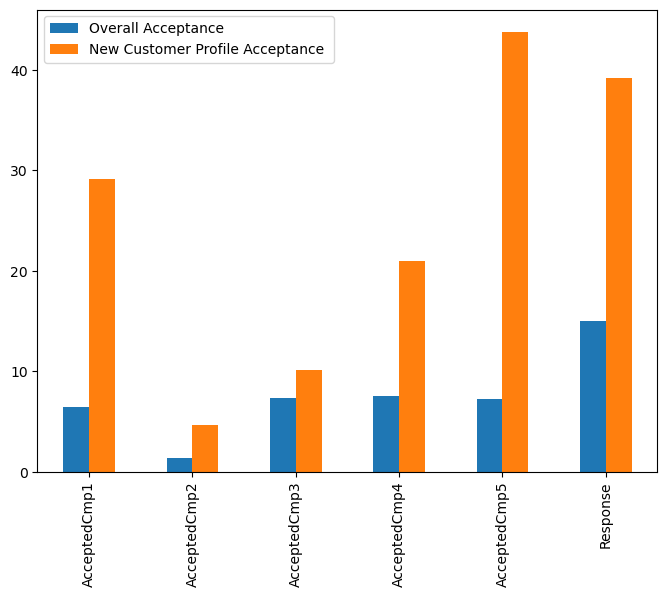

In [67]:
#Calculating success rate of each campaing for both segments 
success_campaign3=pd.DataFrame(success_campaign, columns=['Overall Acceptance'])

success_campaign4=pd.DataFrame((new_profile[Camp_cols].sum()/new_profile.shape[0])*100, columns=['New Customer Profile Acceptance '])

# plot
pd.concat([success_campaign3, success_campaign4], axis=1).plot(kind='bar', figsize=(8,6))
plt.title("")
plt.ylabel("")
plt.show()

In [69]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'new_income',
       'Total_Spending', 'Total_Purchase', 'NumberofChildren',
       'TotalCampaignsAcc', 'income_cat'],
      dtype='object')

In [87]:

df['Recency'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

44

**As there are 99 possible values for days that a customer may have placed an order before, I will slpit them into 3 categories** 
  * New - Customers with about 10 orders within time of 30 days or less -   **df_New_c**
  * Active - Customers with more than 10 purchases within past 30 to 60 days -  **df_Active_c**
  * Churn - Customers who made the last purchase more than 90 days before -  **df_Churn_c**


In [23]:
df_New_c =  df[df['Recency'].between(0,30) & df['Total_Purchase'].between(0,10)]

In [24]:
df_Active_c = df[df['Recency'].between(30,60) & df['Total_Purchase'].between(10,df['Total_Purchase'].max())]

In [25]:
df_Churn_c = df[df['Recency']>90]

**For more advanced analysis on new customers, we can extract a selective group that has more potential than the rest of the group to be  divide the group into 2 parts** 
  * New_High_Potential - Customers with greater forecast value who can make more purchases than their counterparts - **df_New_c_top**

**In this data, I am segregrating the top 5%-10% customers based on their Total Spending value. In terms of marketing and conversion, it is most efective to give this group the "VIP" treatment since long term incentive programs tend to keep them engaged for extended periods** 

<AxesSubplot:ylabel='Frequency'>

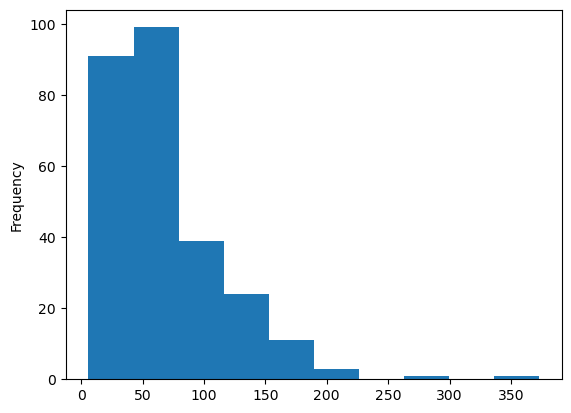

In [26]:
df_New_c["Total_Spending"].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

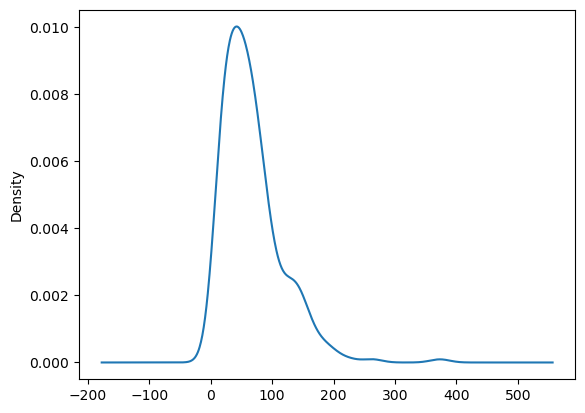

In [417]:
df_New_c["Total_Spending"].plot(kind='kde')

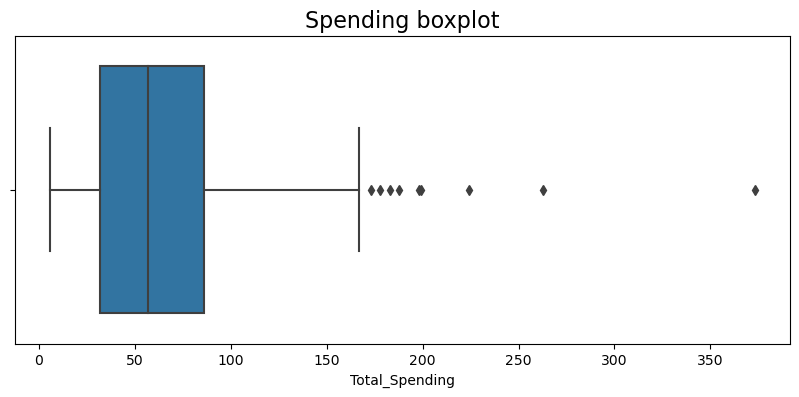

In [134]:
#plotting Boxplot for Total Spend

plt.figure(figsize=(10,4))
sns.boxplot(df_New_c['Total_Spending'])
plt.title('Spending boxplot', size=16)
plt.show()


In [27]:
#Calculating the upper whisker for the Spending variable

Q1 = df_New_c.quantile(q=0.25) #First quartile
Q3 = df_New_c.quantile(q=0.75) #Third quartile

upper_quartile = (Q3)['Total_Spending']   #4th quartile
print("Upper quartile value is: ",upper_quartile)


Upper quartile value is:  86.0


In [28]:
df_New_c_top = df_New_c[df_New_c.Total_Spending>upper_quartile]

In [264]:
df_New_c_top

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Response,Complain,Country,new_income,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc,income_cat
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,0,1,0,SP,21474.0,91,8,1,2,low
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,...,0,0,0,SP,44931.0,96,7,1,0,medium
22,10470,1979,Master,Married,"$40,662.00",1,0,3/15/13,0,40,...,0,0,0,GER,40662.0,92,8,1,0,medium
25,5985,1965,Master,Single,"$33,168.00",0,1,10/13/12,0,80,...,0,0,0,SP,33168.0,122,10,1,0,low
60,4246,1982,Master,Single,"$6,560.00",0,0,12/12/13,2,67,...,0,0,0,SP,6560.0,373,2,0,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,938,1981,Graduation,Married,"$40,211.00",1,1,7/30/13,30,51,...,0,0,0,SP,40211.0,87,7,2,1,medium
709,1087,1975,Master,Together,"$22,669.00",1,0,5/22/13,30,16,...,0,1,0,SP,22669.0,173,10,1,1,low
716,10602,1983,Graduation,Married,"$39,922.00",1,0,2/14/13,30,29,...,0,0,0,IND,39922.0,156,9,1,0,medium
717,3220,1983,Graduation,Married,"$39,922.00",1,0,2/14/13,30,29,...,0,0,0,GER,39922.0,156,9,1,0,medium


#### so these are the upper 25% of the new customers based on their total spends An important thing you remember is that customers in this quartile are potentially long-term customers without much trust in your brand as a result they are relatively sensitive to their experience on your side or app by identifying these new customers and players you can approach them correctly by ensuring that they have a good brand experience

**In the Same way, Churn customers can be divided into 2 parts:** 
  * Early_churn - Customers who did some purchases and did not return back - **df_Late_churn**
  * Late_churn - Customers who purchased a good number of items but did not return for a long time - **df_Early_churn**

In [132]:
df_Churn_c.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'new_income',
       'Total_Spending', 'Total_Purchase', 'NumberofChildren',
       'TotalCampaignsAcc', 'income_cat'],
      dtype='object')

<AxesSubplot:>

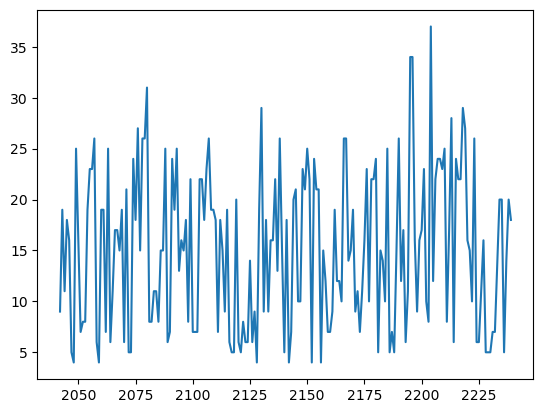

In [133]:
df_Churn_c['Total_Purchase'].plot()

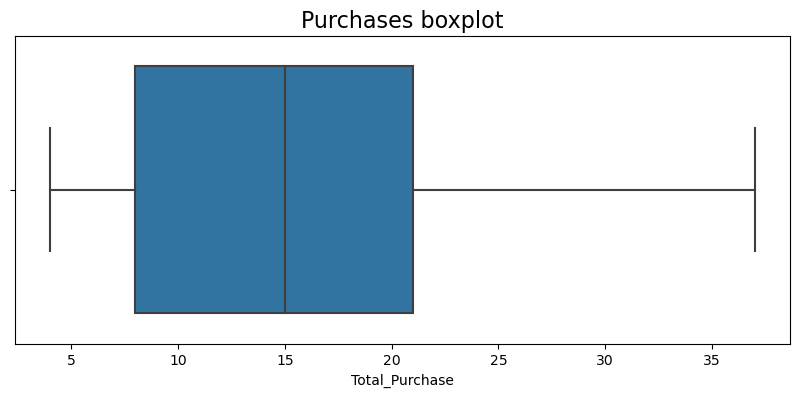

In [137]:
#plotting Boxplot for Total Spend

plt.figure(figsize=(10,4))
sns.boxplot(df_Churn_c['Total_Purchase'])
plt.title('Purchases boxplot', size=16)
plt.show()


In [29]:
#Calculating the center partitioning late and early churn customers

Q2 = df_Churn_c.quantile(q=0.50) #Second quartile
partition_quartile = (Q2)['Total_Purchase']   #Center quartile
print("Partition quartile value is: ",partition_quartile)


Partition quartile value is:  15.0


In [30]:
df_Late_churn = df_Churn_c[df_Churn_c.Total_Purchase>partition_quartile]

In [31]:
df_Early_churn = df_Churn_c[df_Churn_c.Total_Purchase<partition_quartile]

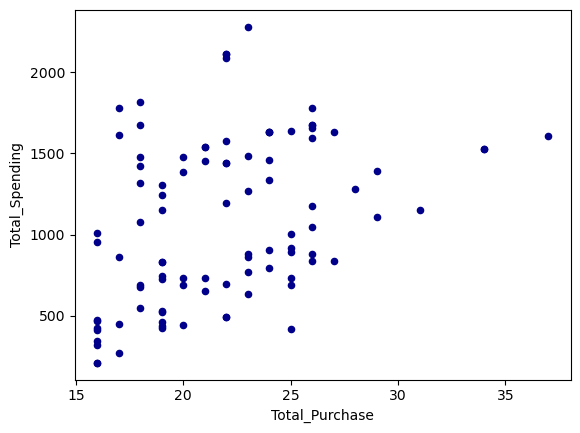

In [32]:
ax = df_Late_churn.plot.scatter(x='Total_Purchase',y='Total_Spending',c='DarkBlue')

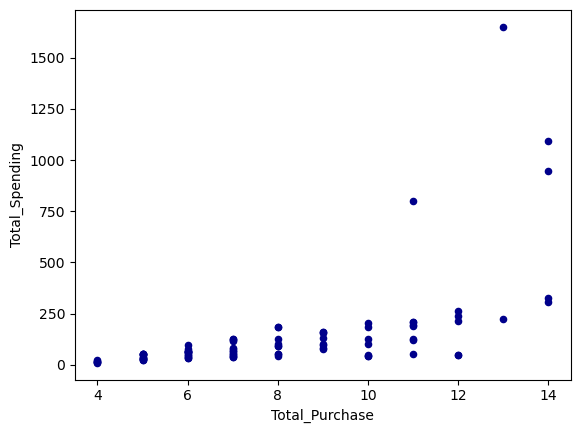

In [268]:
ax = df_Early_churn.plot.scatter(x='Total_Purchase',y='Total_Spending',c='DarkBlue')

**Now we can add these details in the dataset to make it easier to differentiate among the customers for further analysis**

np.where(condition, value if condition is true, value if condition is false)

In [33]:
df['C_type']= 'Not'

In [34]:
len(df)

2235

In [35]:
df2 = df.copy()

In [36]:
df['C_type']

0       Not
1       Not
2       Not
3       Not
4       Not
       ... 
2235    Not
2236    Not
2237    Not
2238    Not
2239    Not
Name: C_type, Length: 2235, dtype: object

In [37]:
df2['C_type']

0       Not
1       Not
2       Not
3       Not
4       Not
       ... 
2235    Not
2236    Not
2237    Not
2238    Not
2239    Not
Name: C_type, Length: 2235, dtype: object

In [38]:
df2['C_type'].value_counts()

Not    2235
Name: C_type, dtype: int64

In [39]:
df2.loc[df2['Recency'].between(0,30) & df2['Total_Purchase'].between(0,10),"C_type" ] = 'New'

In [40]:
df2['C_type'].value_counts()

Not    1966
New     269
Name: C_type, dtype: int64

In [41]:
#Calculating the upper whisker for the Spending variable

Q1 = df_New_c.quantile(q=0.25) #First quartile
Q3 = df_New_c.quantile(q=0.75) #Third quartile

upper_quartile = (Q3)['Total_Spending']   #4th quartile
print("Upper quartile value is: ",upper_quartile)


Upper quartile value is:  86.0


In [42]:
df2.loc[( df2['C_type'] == 'New') & (df2['Total_Spending']>86.0) ,"C_type" ] = 'Top'

In [43]:
df2['C_type'].value_counts()

Not    1966
New     202
Top      67
Name: C_type, dtype: int64

In [44]:
 df[df['Recency'].between(30,60) & df['Total_Purchase'].between(10,44)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Complain,Country,new_income,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc,income_cat,C_type
695,5121,1977,Graduation,Single,"$56,628.00",0,1,3/21/14,30,479,...,0,0,CA,56628.0,761,20,1,1,high,Not
696,2186,1977,Master,Together,"$82,326.00",0,0,3/10/14,30,938,...,1,0,SP,82326.0,2257,22,0,4,very_high,Not
697,10548,1995,Graduation,Single,"$71,163.00",0,0,3/9/14,30,283,...,0,0,GER,71163.0,960,24,0,0,very_high,Not
698,6384,1978,Graduation,Divorced,"$71,022.00",0,1,2/11/14,30,909,...,0,0,US,71022.0,1453,21,1,1,very_high,Not
699,2625,1954,Master,Single,"$42,607.00",0,1,11/17/13,30,156,...,0,0,SA,42607.0,350,14,1,0,medium,Not
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,9576,1982,PhD,Together,"$32,313.00",1,0,2/11/13,60,86,...,0,0,SP,32313.0,159,11,1,0,low,Not
1372,5935,1956,Master,Single,"$55,284.00",0,1,12/24/12,60,547,...,0,0,IND,55284.0,764,23,1,0,high,Not
1375,3202,1987,PhD,Married,"$51,563.00",0,0,10/1/12,60,1166,...,0,0,SA,51563.0,1250,19,0,2,high,Not
1376,1103,1976,Master,Married,"$81,929.00",1,0,9/29/12,60,1486,...,1,0,AUS,81929.0,2053,20,1,3,very_high,Not


In [45]:
df2.loc[df['Recency'].between(30,60) & df['Total_Purchase'].between(10,44),"C_type" ] = 'Active'

In [46]:
df2['C_type'].value_counts()

Not       1515
Active     453
New        202
Top         65
Name: C_type, dtype: int64

In [47]:
#Calculating the center partitioning late and early churn customers

Q2 = df_Churn_c.quantile(q=0.50) #Second quartile
partition_quartile = (Q2)['Total_Purchase']   #Center quartile
print("Partition quartile value is: ",partition_quartile)


Partition quartile value is:  15.0


df_Churn_c = df[df['Recency']>90]


Late Churn
df_Late_churn = df_Churn_c[df_Churn_c.Total_Purchase>partition_quartile]

Early Churn
df_Early_churn = df_Churn_c[df_Churn_c.Total_Purchase<partition_quartile]

In [48]:
df2.loc[(df2['Recency']>90) &  (df2.Total_Purchase>15.0),"C_type" ] = 'Late_churn'

In [49]:
df2.loc[(df2['Recency']>90) &  (df2.Total_Purchase<15.0),"C_type" ] = 'Early_churn'

In [50]:


df2['C_type'].value_counts()

Not            1329
Active          453
New             202
Late_churn       95
Early_churn      91
Top              65
Name: C_type, dtype: int64

#### Finally, the data now is

#### Here, we have categorised customers as New, Active, Top, Late churn and Early churn. The uncategorized customers have a not 

In [53]:
df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'new_income',
       'Total_Spending', 'Total_Purchase', 'NumberofChildren',
       'TotalCampaignsAcc', 'income_cat', 'C_type'],
      dtype='object')

** Now, I want to see if clustering the customers is possible and what kind of clusters can be made available So I willl implement KMeans clustering on my df2. But I do not neet all the columns so I will select a set based on the analysis that was done previously **

In [58]:
df_Kmeans = df2[['Education', 'Marital_Status','Recency', 'MntWines', 'MntFruits','MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Country', 'new_income',
       'NumberofChildren']].copy()

In [59]:
df_Kmeans

,Education,Marital_Status,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Country,new_income,NumberofChildren
0,Graduation,Divorced,0,189,104,379,111,189,218,1,4,4,6,1,SP,84835.0,0
1,Graduation,Single,0,464,5,64,7,0,37,1,7,3,7,5,CA,57091.0,0
2,Graduation,Married,0,134,11,59,15,2,30,1,3,2,5,2,US,67267.0,1
3,Graduation,Together,0,10,0,1,0,0,0,1,1,0,2,7,AUS,32474.0,2
4,Graduation,Single,0,6,16,24,11,0,34,2,3,1,2,7,SP,21474.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,99,372,18,126,47,48,78,2,5,2,11,4,US,66476.0,1
2236,Master,Married,99,5,10,13,3,8,16,1,1,0,3,8,SP,31056.0,1
2237,Graduation,Divorced,99,185,2,88,15,5,14,2,6,1,5,8,SP,46310.0,1
2238,Graduation,Married,99,267,38,701,149,165,63,1,5,4,10,3,IND,65819.0,0


Creating dummy columns for categorical datatype

In [60]:
X= pd.get_dummies(df_Kmeans)

In [61]:
X

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,Marital_Status_Together,Marital_Status_Widow,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,0,189,104,379,111,189,218,1,4,4,...,0,0,0,0,0,0,0,0,1,0
1,0,464,5,64,7,0,37,1,7,3,...,0,0,0,1,0,0,0,0,0,0
2,0,134,11,59,15,2,30,1,3,2,...,0,0,0,0,0,0,0,0,0,1
3,0,10,0,1,0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,0
4,0,6,16,24,11,0,34,2,3,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,99,372,18,126,47,48,78,2,5,2,...,0,0,0,0,0,0,0,0,0,1
2236,99,5,10,13,3,8,16,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2237,99,185,2,88,15,5,14,2,6,1,...,0,0,0,0,0,0,0,0,1,0
2238,99,267,38,701,149,165,63,1,5,4,...,0,0,0,0,0,1,0,0,0,0


In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
scaled_X = scaler.fit_transform(X)

In [67]:
from sklearn.cluster import KMeans

In [68]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the i

In [72]:
model = KMeans(n_clusters=5, random_state=100)

In [76]:
cluster_labels = model.fit_predict(scaled_X)

In [77]:
X['Cluster']= cluster_labels

<AxesSubplot:>

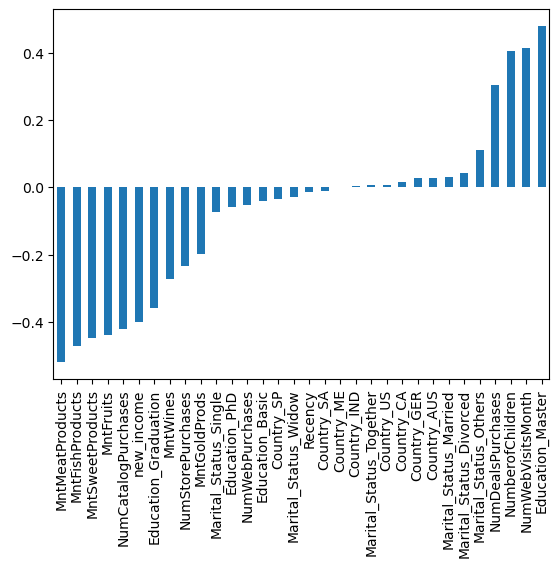

In [82]:
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind = 'bar')

In [83]:
X['Cluster'].value_counts()

1    782
0    584
2    516
3    349
4      4
Name: Cluster, dtype: int64

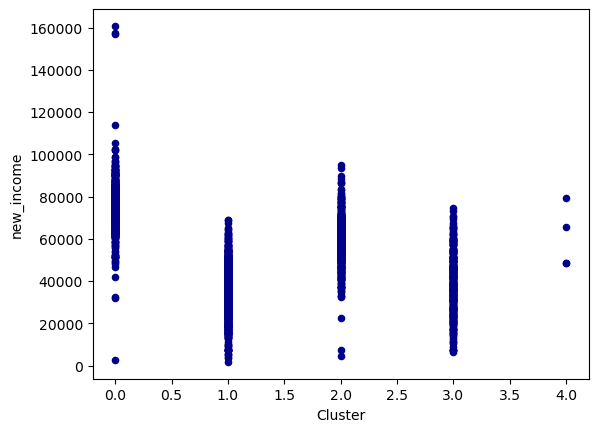

In [84]:
ax = X.plot.scatter(x='Cluster',y='new_income',c='DarkBlue')

In [91]:
the_list = ['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'new_income',
       'NumberofChildren', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Others',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Country_AUS', 'Country_CA', 'Country_GER',
       'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US',
       'Cluster']

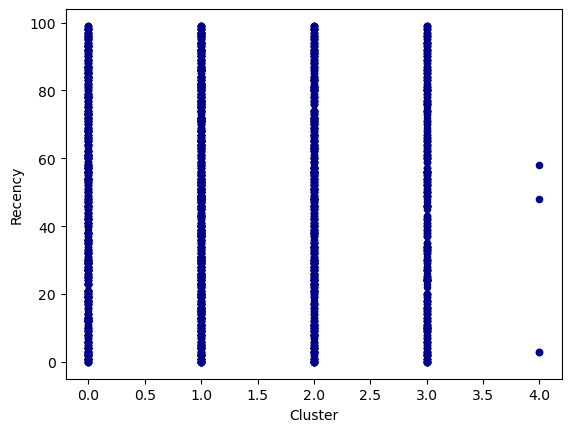

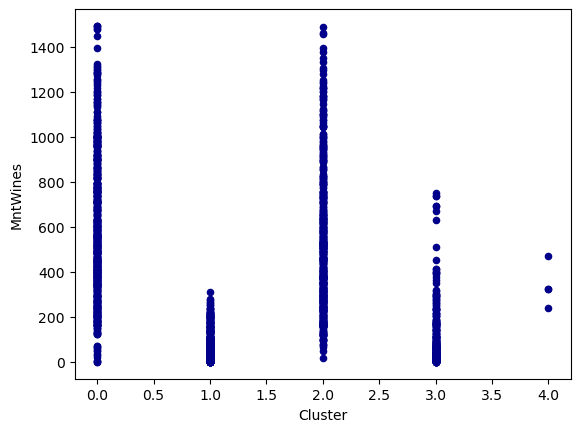

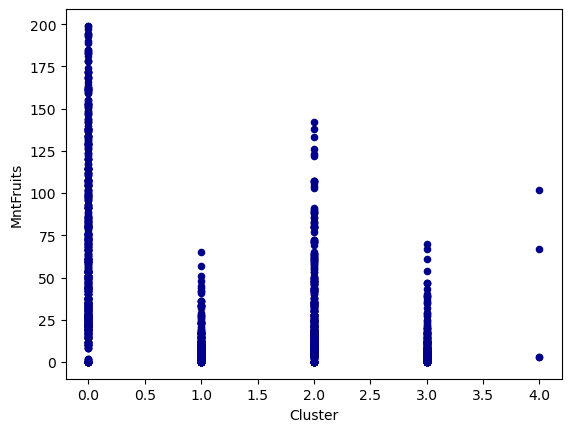

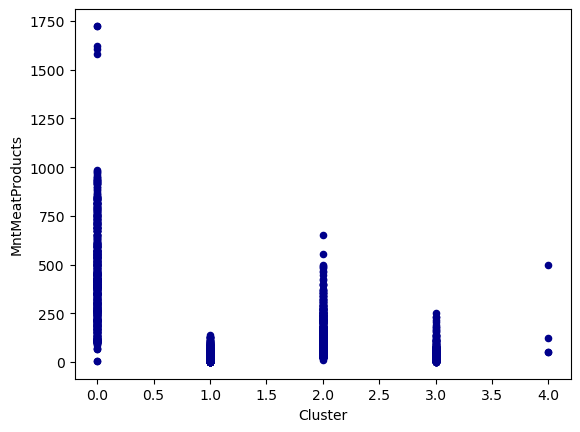

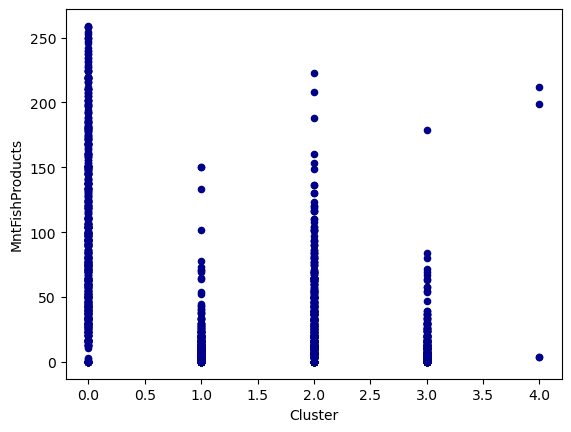

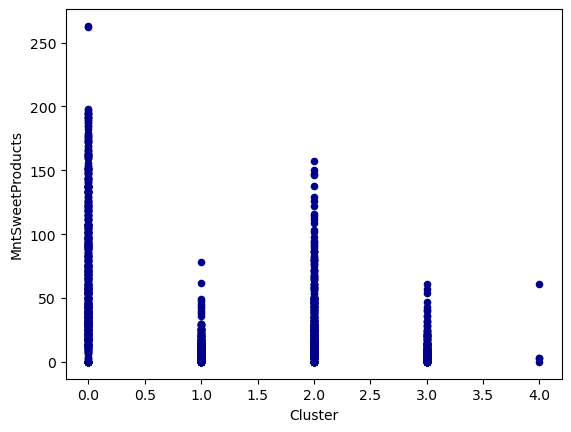

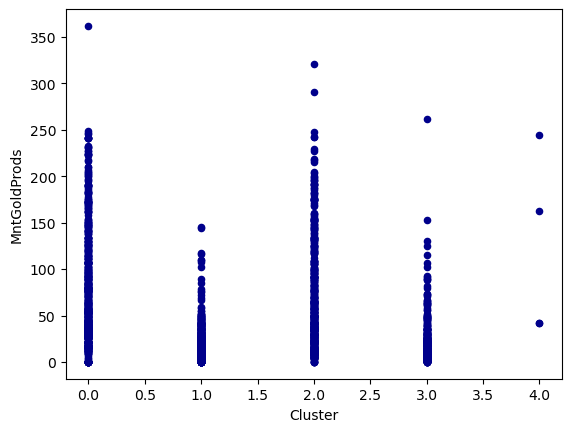

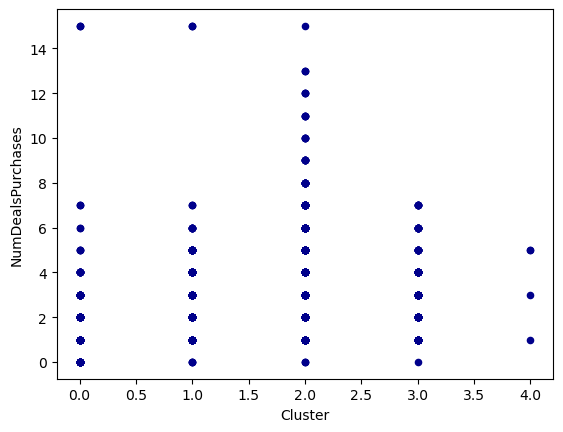

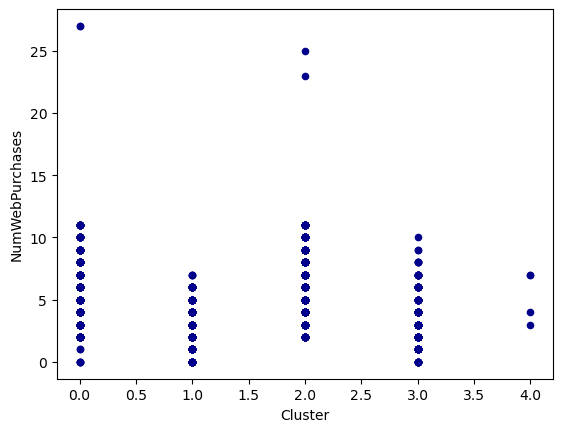

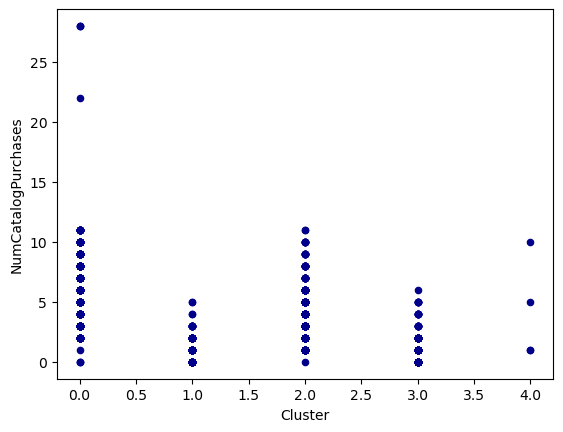

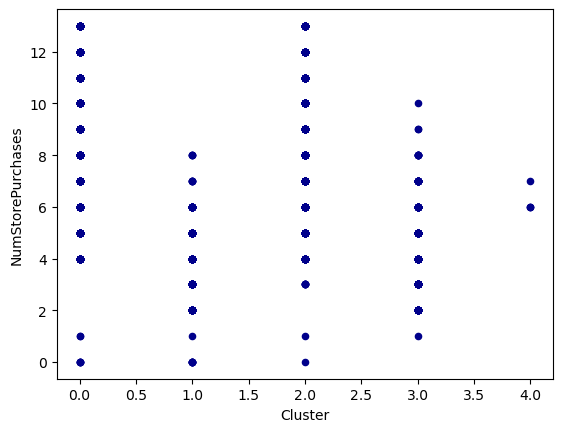

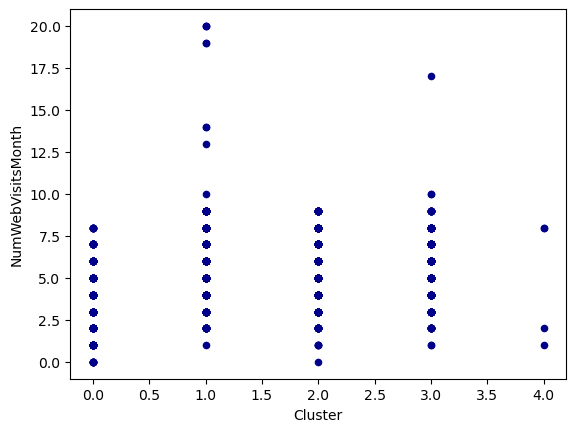

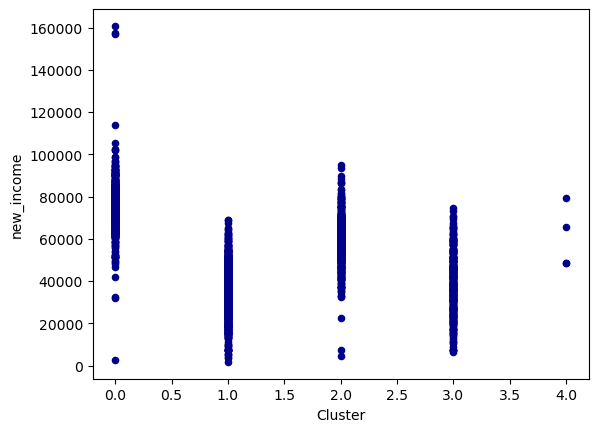

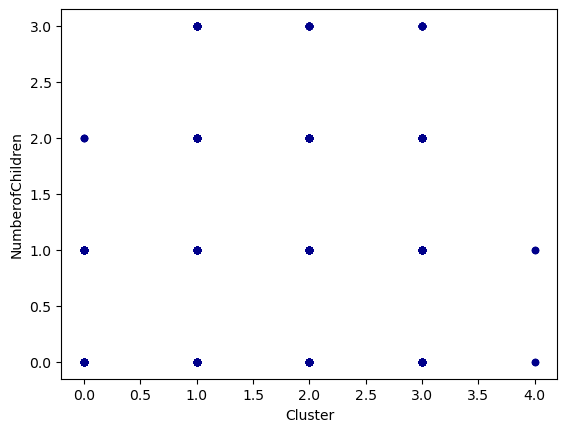

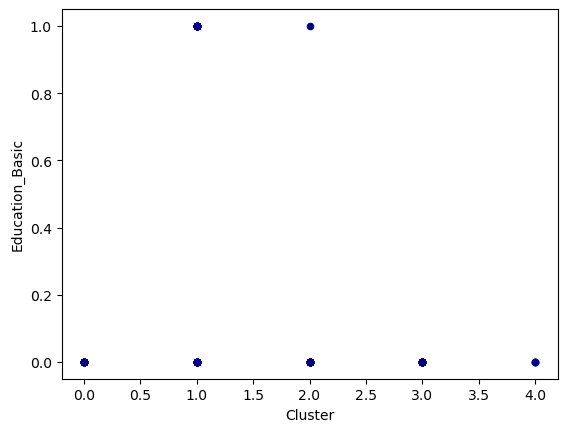

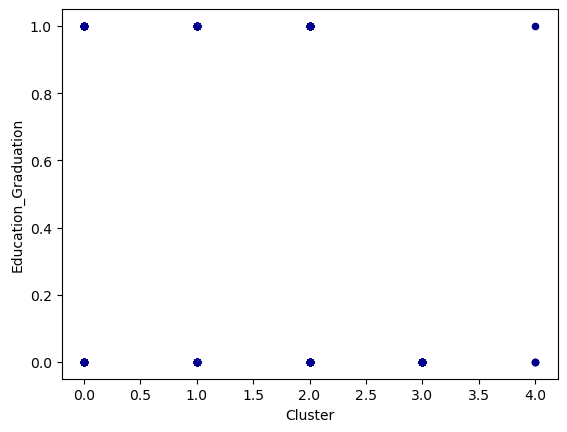

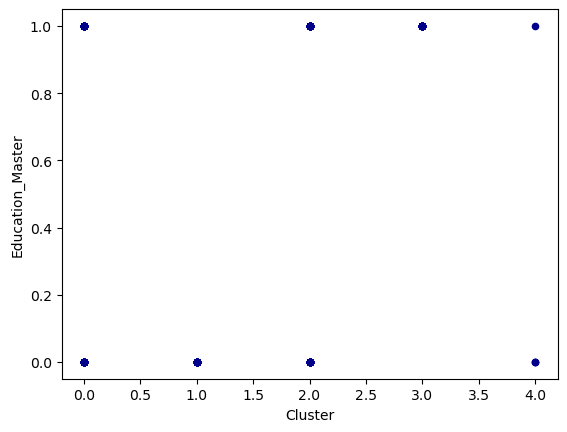

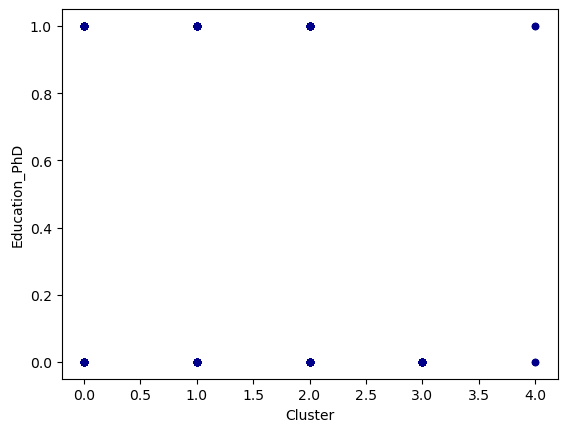

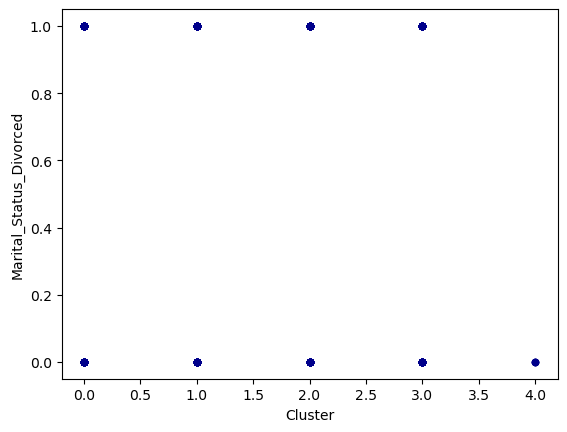

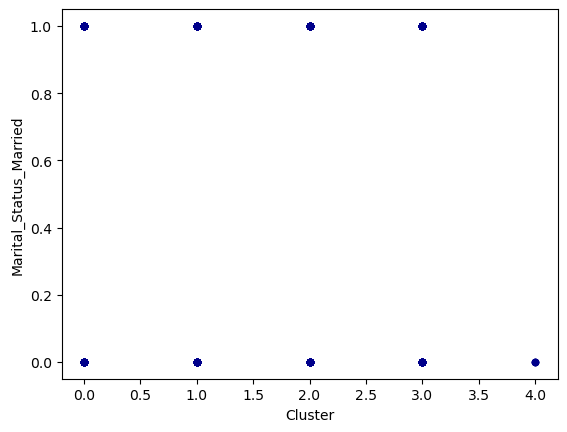

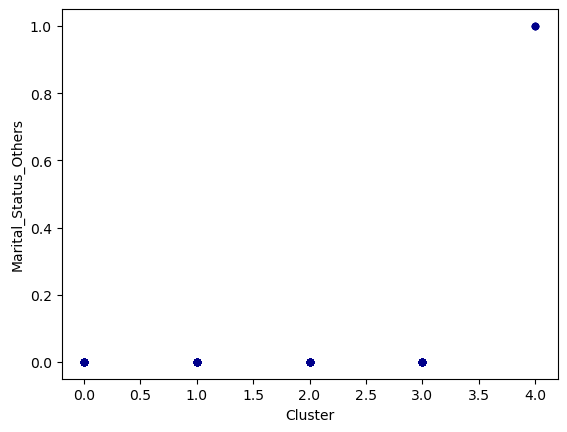

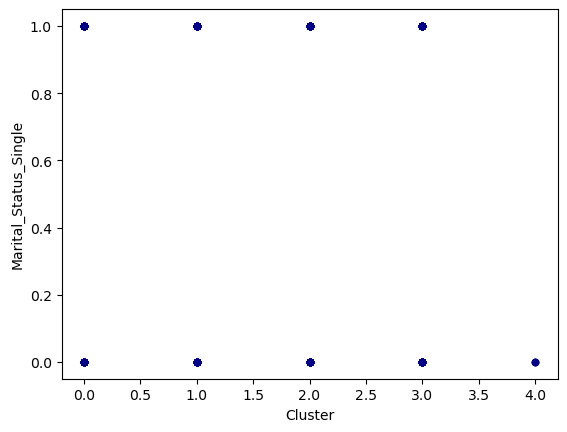

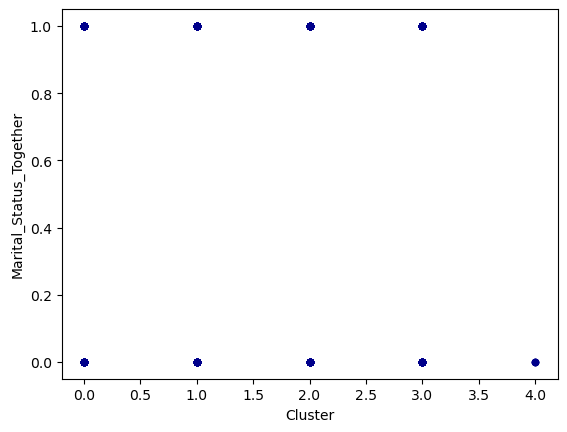

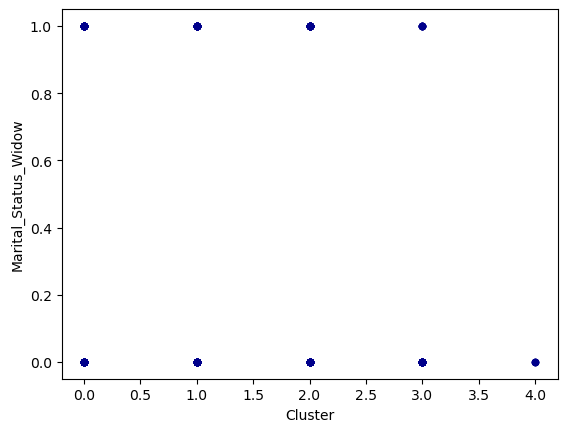

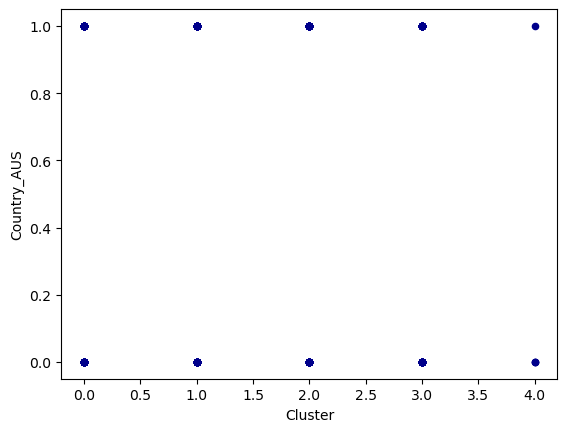

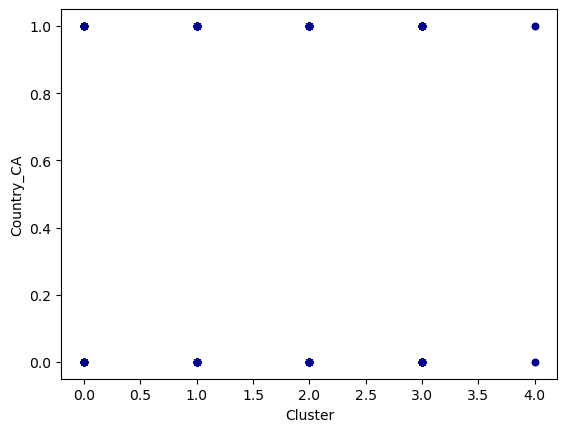

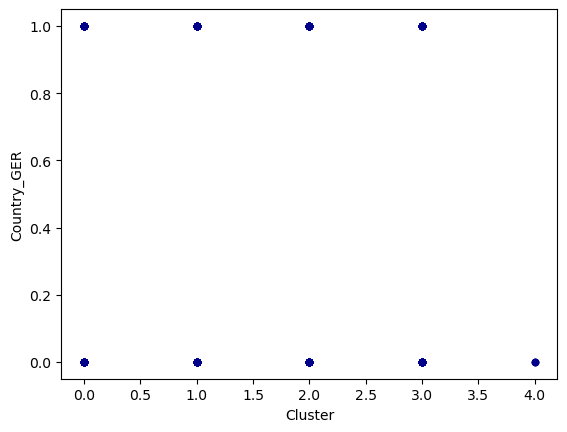

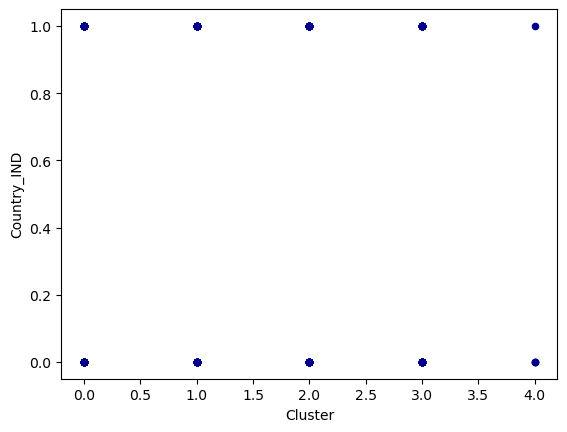

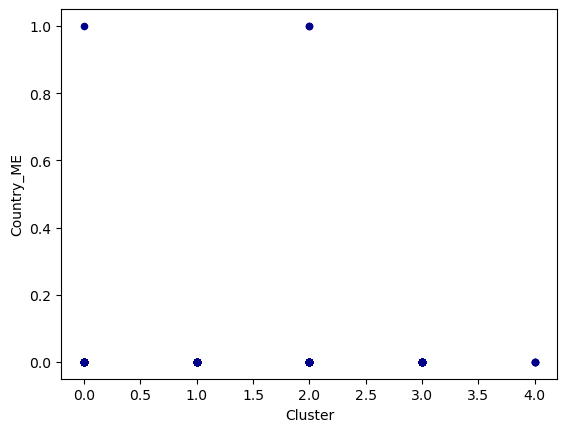

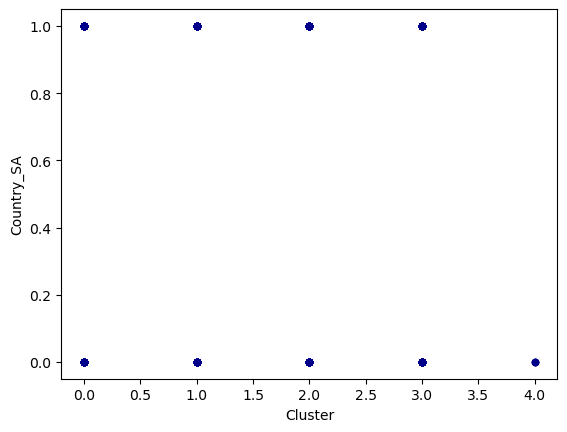

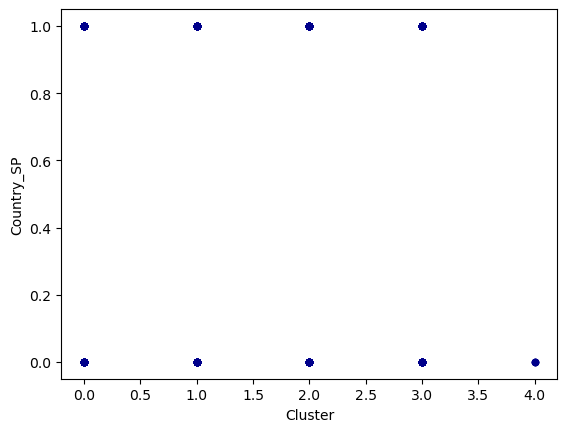

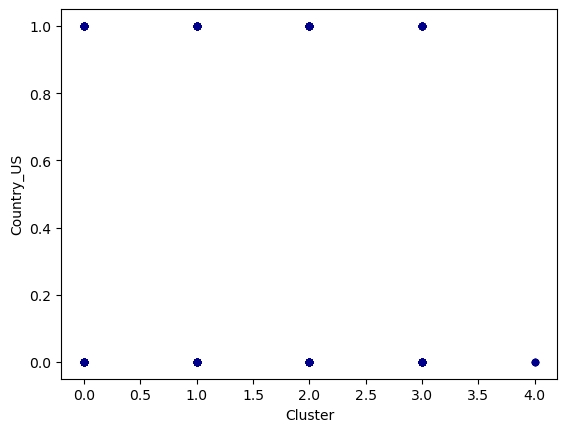

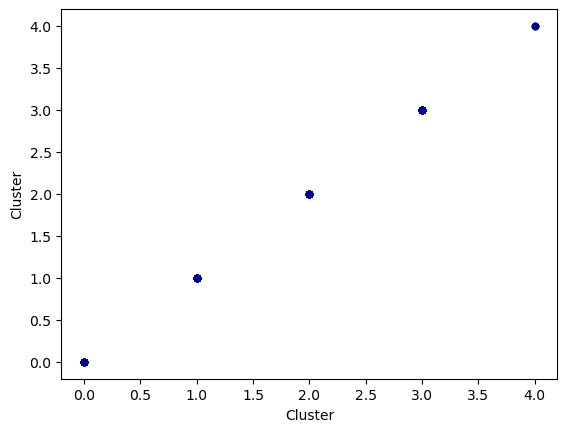

In [92]:
for i in the_list:
    ax = X.plot.scatter(x='Cluster',y=i,c='DarkBlue')

## Conclusion and Recommendations

#Conclusion: 

- The average household income of the customer is 52,247.25 and has a high range from 1,730 to 66,6666.

- The customers with 3 children acceptance rate are less than 7% across all the campaigns.

- On average, the customers spend the highest amount of their spending on buying meant (mean: 303.93) and wines (mean: 166.95)

- The average numbers of the purchases customers are using the company website, and 'in store' purchases are 4.08 and 5.79 respectively. 

- On the other hand, the acceptance rate for campaign 2 is around 15.5 % (highest), and the acceptance rate for campaign 6 is about 1.2% (lowest). In addition, except for customers with basic education levels, all education levels follow the same trend. 

- The US customers mostly accepted the campaign 2 (~12%), followed by the campaign 1 (7.34%) and campaign 4 (6.42%).

- The 'high' and 'very high' income customers made more than 60% of the 'in-store' and purchases through the company website. In addition, NumStorePurchase & NumCatalog purchases show a high positive correlation with customer income (0.7). Also, NumWebPurchases has a positive correlation of 0.5  income.

# Recommendations:

- Chief Marketing Officer must **pay significant attention to the variables such as the annual income of the customers, the number of children per
  household, and the amount spent on wine products.** Hence, the CMO should develop different marketing strategies based on these variables
  to optimize for ROI on conversion rates.

- Similarly, the CMO should also contact the Data Science department to conduct further analysis about the customer's location to identify keys
  insights and impact on the campaign's success rate.

- Products such as meat and wines are doing well in maximizing sales. Hence, the CEO should pay significant attention to reviewing these customers' profiles to retain these customers and increase the sales of the other products simultaneously.

- As 'high' and 'very high' income customers made more than 60% of their purchases via 'in-store and 'company website.' Besides, the low & medium-income customers rank high in the number of purchases made with discounts. And new customer profile has a high score on campaign 3. Hence, the CMO should design new marketing campaigns with personalized offers to these customers as per their profile to achieve overall growth and optimize for ROI on conversation rates.